## Put data together in a pandas dataframe

In [1]:
import seaborn as sns
from datetime import datetime
from skimage.io import imsave
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
#%plt.style.use("v_paper")
import pandas as pd
from scipy.io import loadmat
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
import re
from statsmodels.stats.anova import anova_lm
import os
import os.path
import statsmodels.api as smapi
import sys
import warnings
from sklearn.linear_model import LinearRegression
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import seaborn as sns
import statsmodels as sm
import scipy
from pathlib import Path

Import data

In [2]:
GoodICFiles=pd.read_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\GoodICsdf.pkl")

In [3]:
RegionNames=pd.read_csv('Z:\GrunwaldKadow_group\Sophie\WalkProject\RegionNames.txt',header=None)[0].to_list()

RegionNamesShort=[]
RegionSide=[]
for j in range(75):
    if '_' in RegionNames[j]:
        RegionNamesShort.append(RegionNames[j].split('_')[0])
        RegionSide.append(RegionNames[j].split('_')[1])
    else:
        RegionNamesShort.append(RegionNames[j])
        RegionSide.append('Both')

# Let's flatten

In [4]:
for j in range(75):
    Regionsdf=GoodICFiles.loc[GoodICFiles.index == 0].assign(Side=RegionSide[j]).assign(RegionNames=RegionNamesShort[j]).assign(RegionNum=j)

In [5]:
for i in range(GoodICFiles.shape[0]):
    for j in range(75):
        Regionsdf=Regionsdf.append(GoodICFiles.loc[GoodICFiles.index == i].assign(Side=RegionSide[j]).assign(RegionNames=RegionNamesShort[j]).assign(RegionNum=j))

In [6]:
GoodICFiles.loc[GoodICFiles.index==164,'Correspondance']='OL-Center,PPM2-VI,EB-DA,PPM2-VI,PPM2-LW,PPM2-LW,FBlaym,WE-DA,SLP-SMPproj,PLP-DA,SMPl-SIP,SLP-SMPproj,Alpha3,,OL-WE,,,SMPl-SIP,PLP-DA,SMPd,PB-DA,SMPl-SIP,FBlayd,Gamma2,,,,SLP-SMPproj,SLP,Beta2Betap2,,Alphap3,Gamma4,SLP,CLvert,CLvert,,Gamma4,,,SLP-SMPproj,Gamma5,,Gamma3,Gamma4,FBv,,,,,,,Beta1Betap1,Gamma1,,,SLP-SMPproj,SLP-SMPproj,SMPl-SIP,Alpha2,,Beta1Betap1'

In [7]:
T=GoodICFiles.iloc[0]['Correspondance'].split(',')
Th=T[0].split(' ')
#T[0]=Th[len(Th)-1]
if len(T)==1:
        Compdf=GoodICFiles.loc[GoodICFiles.index == 0].assign(CompID=T[0]).assign(CompNum=0)
else:
    for j in range(len(T)):
        Compdf=GoodICFiles.loc[GoodICFiles.index == 0].assign(CompID=T[j]).assign(CompNum=j)

In [8]:
#for i in range(GoodICFiles.shape[0]):
for i in range(GoodICFiles.shape[0]):
    T=GoodICFiles.iloc[i]['Correspondance'].split(',')
    Th=T[0].split(' ')
   # T[0]=Th[len(Th)-1]
    if len(T)==1:
        Compdf=Compdf.append(GoodICFiles.loc[GoodICFiles.index == i].assign(CompID=T[0]).assign(CompNum=0))
    else:
        for j in range(len(T)):
            Compdf=Compdf.append(GoodICFiles.loc[GoodICFiles.index == i].assign(CompID=T[j]).assign(CompNum=j))

In [9]:
Compdf.loc[Compdf['CompID']=='     ','CompID']=''
Compdf.loc[Compdf['CompID']==' ','CompID']=''

In [10]:
Compdf.loc[Compdf['CompID']=='AMMC','CompID']='AMMC-WE'
Compdf.loc[Compdf['CompID']=='AVLPprojlat','CompID']='AVLPprojl'
Compdf.loc[Compdf['CompID']=='Alpha3p','CompID']='Alphap3'
Compdf.loc[Compdf['CompID']=='Cup','CompID']='PENP-CL'
Compdf.loc[Compdf['CompID']=='Ebv','CompID']='EBhalf'
Compdf.loc[Compdf['CompID']=='Fbcol','CompID']='FBcol'
Compdf.loc[Compdf['CompID']=='Fblayv','CompID']='FBlayv'
Compdf.loc[Compdf['CompID']=='Fblaym','CompID']='FBlaym'
Compdf.loc[Compdf['CompID']=='Fblayd','CompID']='FBlayd'
Compdf.loc[Compdf['CompID']=='CLl','CompID']='CL'
Compdf.loc[Compdf['CompID']=='MB-ML','CompID']='MB-ML-Cre'
Compdf.loc[Compdf['CompID']=='MB-ML-CRE','CompID']='MB-ML-Cre'
Compdf.loc[Compdf['CompID']=='NO-FB-PB','CompID']='NO-PB-FB'
Compdf.loc[Compdf['CompID']=='OL-Central','CompID']='OL-Center'
Compdf.loc[Compdf['CompID']=='OL-central','CompID']='OL-Center'
Compdf.loc[Compdf['CompID']=='OL-center','CompID']='OL-Center'
Compdf.loc[Compdf['CompID']=='Other','CompID']='Others'
Compdf.loc[Compdf['CompID']=='SIP-SMP','CompID']='SMPl-SIP'
Compdf.loc[Compdf['CompID']=='SIP-SMPl','CompID']='SMPl-SIP'
Compdf.loc[Compdf['CompID']=='SMP-SIP','CompID']='SMPl-SIP'
Compdf.loc[Compdf['CompID']=='VLPprojm','CompID']='AVLPprojm'
Compdf.loc[Compdf['CompID']=='AVLPl','CompID']='VLPl'
Compdf.loc[Compdf['CompID']=='WE','CompID']='AMMC-WE'
Compdf.loc[Compdf['CompID']=='WE-AMMC','CompID']='AMMC-WE'

Compdf.loc[Compdf['CompID']=='WE-V','CompID']='WE-DA'

Compdf.loc[Compdf['CompID']=='others','CompID']='Others'
Compdf.loc[Compdf['CompID']=='turn-dorsal','CompID']='turnd'
Compdf.loc[Compdf['CompID']=='SMP-SLPproj','CompID']='SLP-SMPproj'
Compdf.loc[Compdf['CompID']=='SMP-SLP-proj','CompID']='SLP-SMPproj'
Compdf.loc[Compdf['CompID']=='SMP-SLP','CompID']='SLP-SMP'
Compdf.loc[Compdf['CompID']=='Fblow','CompID']='FBlayv'
Compdf.loc[Compdf['CompID']=='LAL-GNG','CompID']='LAL-PS'
Compdf.loc[Compdf['CompID']=='GNG-PS','CompID']='LAL-PS'
Compdf.loc[Compdf['CompID']=='GNG-LAL','CompID']='LAL-PS'
Compdf.loc[Compdf['CompID']=='Kcab','CompID']='KCab'
Compdf.loc[Compdf['CompID']=='Kcapbp','CompID']='KCapbp'
Compdf.loc[Compdf['CompID']=='Lhcrest','CompID']='LHcrest'
Compdf.loc[Compdf['CompID']=='beta2','CompID']='Beta2Betap2'
Compdf.loc[Compdf['CompID']=='Beta2','CompID']='Beta2Betap2'
Compdf.loc[Compdf['CompID']=='Betap2','CompID']='Beta2Betap2'
Compdf.loc[Compdf['CompID']=='EB-PB','CompID']='PB-EB'
Compdf.loc[Compdf['CompID']=='NO-FB','CompID']='FB-NO'
Compdf.loc[Compdf['CompID']=='OL-e','CompID']='LOP'
Compdf.loc[Compdf['CompID']=='OL-VMNP','CompID']='OL-Center'
Compdf.loc[Compdf['CompID']=='SMPd','CompID']='SIP-SMPd'
Compdf.loc[Compdf['CompID']=='Alpha','CompID']='SLP-Alpha'
Compdf.loc[Compdf['CompID']=='SCL','CompID']='CL'
Compdf.loc[Compdf['CompID']=='Vert','CompID']='CLvert'
Compdf.loc[Compdf['CompID']=='vert','CompID']='CLvert'
Compdf.loc[Compdf['CompID']=='FLA-CAN-VES-PS','CompID']='LAL-PS'

Compdf.loc[Compdf['CompID']=='PENP-SLP','CompID']='PRW-SLP'
Compdf.loc[Compdf['CompID']=='GNG-SLP','CompID']='PRW-SLP'
Compdf.loc[Compdf['CompID']=='PB-EB-NO','CompID']='PB-EB'
Compdf.loc[Compdf['CompID']=='PENP-ICL','CompID']='PENP-CL'
Compdf.loc[Compdf['CompID']=='PENP','CompID']='OL-PENP'
Compdf.loc[Compdf['CompID']=='PId','CompID']='SMPd-PI'
Compdf.loc[Compdf['CompID']=='Beta1','CompID']='Beta1Betap1'
Compdf.loc[Compdf['CompID']=='Betap1','CompID']='Beta1Betap1'
Compdf.loc[Compdf['CompID']=='SIP-SMP-FB','CompID']="FB-SN"
Compdf.loc[Compdf['CompID']=='FB-SP-CL','CompID']="FB-SN"
Compdf.loc[Compdf['CompID']=='FB-SLP-CL','CompID']="FB-SN"
Compdf.loc[Compdf['CompID']=='Pbfull','CompID']="PBfull"
Compdf.loc[Compdf['CompID']=='GNGpl','CompID']="IPS-Y"
Compdf.loc[Compdf['CompID']=='PRW-CL','CompID']="PENP-CL"
Compdf.loc[Compdf['CompID']=='Clvert','CompID']="CLvert"
Compdf.loc[Compdf['CompID']=='GNGslant','CompID']="GNG-AMMC"
Compdf.loc[Compdf['CompID']=='GNGslantm','CompID']="GNG-AMMC"
Compdf.loc[Compdf['CompID']=='AVLP','CompID']="AVLPm"
Compdf.loc[Compdf['CompID']=='Bracket','CompID']="PLP-DA"
Compdf.loc[Compdf['CompID']=='POC','CompID']="OL-PENP"
Compdf.loc[Compdf['CompID']=='LHcrest','CompID']="CL-LH"
Compdf.loc[Compdf['CompID']=='GMGml','CompID']="GNGml"

In [11]:
Compdf.loc[(Compdf.CompID == "EB") & (Compdf.GAL4 == "TH"),'CompID']="EB-DA"
Compdf.loc[(Compdf.CompID == "PLP") & (Compdf.GAL4 == "TH"),'CompID']="PLP-DA"
Compdf.loc[(Compdf.CompID == "PENP-CL") & (Compdf.GAL4 == "TH"),'CompID']="PENP-CL-DA"
Compdf.loc[(Compdf.CompID == "PB") & (Compdf.GAL4 == "TH"),'CompID']="PB-DA"
Compdf.loc[(Compdf.CompID == "PB") & (Compdf.GAL4 == "Trh"),'CompID']="PB-DA"
Compdf.loc[(Compdf.CompID == "PB") & (Compdf.GAL4 == "TDC"),'CompID']="PB-DA"

In [12]:
print(sorted(list(pd.unique(Compdf['CompID']))))

['', '5', 'AL', 'AMMC-PLP', 'AMMC-WE', 'AOTU-BU', 'ATL', 'AVLPd', 'AVLPm', 'AVLPonlyproj', 'AVLPproj', 'AVLPprojl', 'AVLPprojm', 'AVLPshell', 'AVLPsmear', 'Alpha1', 'Alpha2', 'Alpha3', 'Alphap3', 'BU-PBl-EB', 'Beta1Betap1', 'Beta2Betap2', 'CA', 'CL', 'CL-LH', 'CL?', 'CLvert', 'Central', 'DorsalBridge', 'Duck', 'EB', 'EB-DA', 'EBhalf', 'EBquad', 'FB', 'FB-NO', 'FB-SN', 'FBcol', 'FBlayd', 'FBlaym', 'FBlayv', 'FBv', 'FLA v ', 'GNG', 'GNG-AMMC', 'GNG-CL', 'GNGcon', 'GNGl', 'GNGm', 'GNGml', 'GNGp', 'GNGva', 'GNGvw', 'GOR', 'Gamma1', 'Gamma2', 'Gamma3', 'Gamma4', 'Gamma5', 'IB', 'IPS-Y', 'KC', 'KCab', 'KCapbp', 'KCg', 'LAL', 'LAL-CL', 'LAL-PS', 'LAT', 'LH', 'LH-SLP', 'LOP', 'LaT', 'M-Omega', 'MB', 'MB-ML-Cre', 'MultiGl', 'NO', 'NO-Fblayd', 'NO-PB', 'NO-PB-EB', 'NO-PB-FB', 'OL', 'OL-Center', 'OL-FB', 'OL-PENP', 'OL-PLP', 'OL-VLPl', 'OL-WE', 'Others', 'PB', 'PB-DA', 'PB-EB', 'PBfull', 'PENP-CL', 'PENP-CL-DA', 'PENP-LH', 'PENPp', 'PI', 'PI-POC', 'PI-PRW', 'PLP', 'PLP-DA', 'PLP-LH', 'PN', 'PN-KC

In [13]:
GoodICFiles.shape[0]

271

In [14]:
for i in range(GoodICFiles.shape[0]):
    try:
        TextCor=GoodICFiles.iloc[i]['TSfile'].replace('TS.mat','GoodICAnnotation.txt').replace('TS','GoodICAnnotation.txt').replace('/','\\').replace('\\media\\NAS','Z:\\GrunwaldKadow_group')
        TS=loadmat(GoodICFiles.iloc[i]['TSfile'].replace('/','\\').replace('\\media\\NAS','Z:\\GrunwaldKadow_group').replace('.mat','GoodIC.mat'))['TSgoodIC']
        with open(TextCor, "w") as text_file:
            if len(TS)==1:        
                text_file.write('') 
            else:
                for j in range(len(TS)):    
                    if Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j)]['CompID'].empty:
                        text_file.write(',')     
                    else:    
                        text_file.write(list(Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j)]['CompID'])[0]+',') 
                        
    except:
        continue

In [15]:
AllCompID=pd.unique(Compdf['CompID'])

with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\AllCompID.txt', 'w') as f:
    for line in AllCompID:
        f.write(line)
        f.write('\n')

In [16]:
Compdf=Compdf.reset_index()

In [17]:
GoodICFiles.to_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\GoodICsdf.pkl")
GoodICFiles.to_pickle("GoodICsdf.pkl")

In [18]:
Compdf.to_pickle("Compdf.pkl")
Compdf.to_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\Compdf.pkl")

In [19]:
Regionsdf.to_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\Regionsdf.pkl")
Regionsdf.to_pickle("Regionsdf.pkl")

# Let's regress

In [20]:
Compdf=pd.read_pickle("Compdf.pkl")

In [21]:
Regionsdf=pd.read_pickle("Regionsdf.pkl")

## Turn components

In [22]:
Compdf['CoefTurn_ipsi']=np.nan
Compdf['R2Turn_ipsi']=np.nan
Compdf['CoefTurn_contra']=np.nan
Compdf['CoefIpsi_contra']=np.nan
Compdf['R2Turn_contra']=np.nan
Compdf['R2Ipsi_contra']=np.nan
Compdf['L_R']=np.nan
Compdf['R2ipsi_R2contra']=np.nan
Compdf['Coefipsi_Coefcontra']=np.nan

Regionsdf['CoefTurn_ipsi']=np.nan
Regionsdf['R2Turn_ipsi']=np.nan
Regionsdf['CoefTurn_contra']=np.nan
Regionsdf['CoefIpsi_contra']=np.nan
Regionsdf['R2Turn_contra']=np.nan
Regionsdf['R2Ipsi_contra']=np.nan
Regionsdf['R2ipsi_R2contra']=np.nan
Regionsdf['Coefipsi_Coefcontra']=np.nan

In [23]:
Compdf['CoefForcedTurn_ipsi']=np.nan
Compdf['R2ForcedTurn_ipsi']=np.nan
Compdf['CoeffForcedTurn_contra']=np.nan
Compdf['CoeffForcedIpsi_contra']=np.nan
Compdf['R2ForcedTurn_contra']=np.nan
Compdf['R2ForcedIpsi_contra']=np.nan
Compdf['L_R']=np.nan
Compdf['R2Forcedipsi_R2contra']=np.nan
Compdf['CoeffForcedipsi_Coefcontra']=np.nan

Regionsdf['CoeffForcedTurn_ipsi']=np.nan
Regionsdf['R2ForcedTurn_ipsi']=np.nan
Regionsdf['CoeffForcedTurn_contra']=np.nan
Regionsdf['CoeffForcedIpsi_contra']=np.nan
Regionsdf['R2ForcedTurn_contra']=np.nan
Regionsdf['R2ForcedIpsi_contra']=np.nan
Regionsdf['R2Forcedipsi_R2contra']=np.nan
Regionsdf['CoeffForcedipsi_Coefcontra']=np.nan

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\nsyb7f\216\216Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\nsyb7f\216\Data216ss1regcdFF2000pointskf171Smith0_4_60TSGoodIC.mat


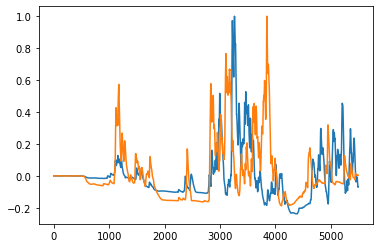

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\100106-GSB2\100106Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\100106-GSB2\GSB2_psfproj_dff_kf_169ICs_TSGoodIC.mat


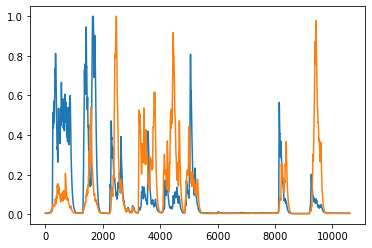

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\B34-B38\B35Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\B34-B38\DataB35regdFF1000pointskfc212Smith20_4_86TSGoodIC.mat


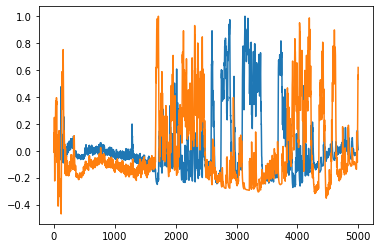

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\B34-B38\B36Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\B34-B38\DataB36regdFF1000pointskfc202Smith20_4_84TSGoodIC.mat


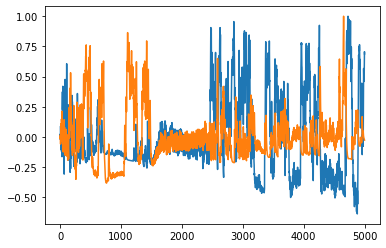

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\B34-B38\B37Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\B34-B38\DataB37ss1reg194TSGoodIC.mat


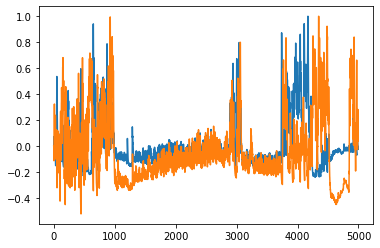

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\B34-B38\B38Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\B34-B38\DataB38ss1reg180TSGoodIC.mat


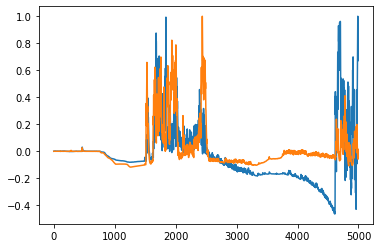

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\B39-44\B39Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\B39-44\DataB39reg296Smith20_4_160TSGoodIC.mat


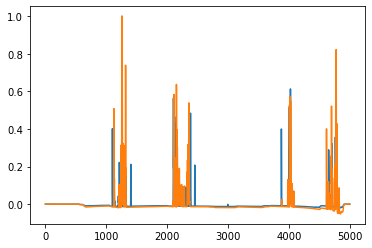

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\B39-44\B40Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\B39-44\DataB40ss1reg284TSGoodIC.mat


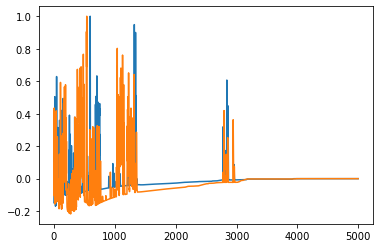

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\B39-44\B41Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\B39-44\DataB41ss1regcdFF4000pointskf238TSGoodIC.mat


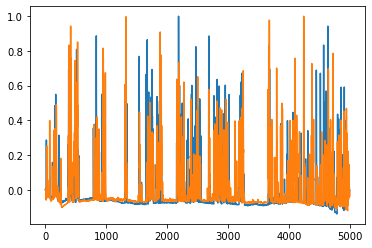

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\B39-44\B43Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\B39-44\DataB43reg202TSGoodIC.mat


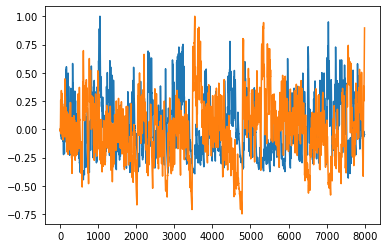

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\B180-B184\B180Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\B180-B184\DataB180ss1reg262TSGoodIC.mat


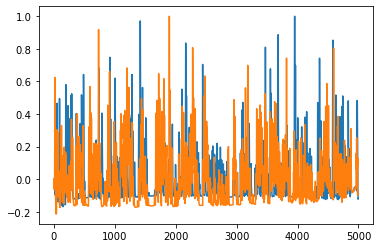

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\B180-B184\B182Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\B180-B184\DataB182ss1reg350TSGoodIC.mat


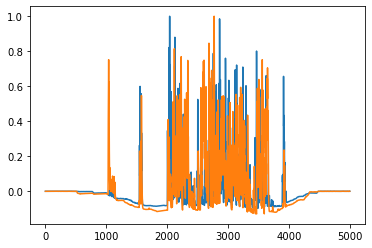

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\B180-B184\B183Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\B180-B184\DataB183ss1reg282TSGoodIC.mat


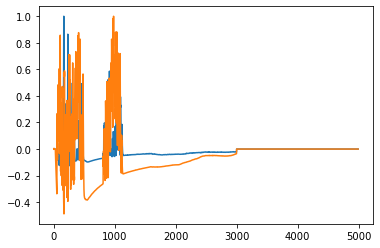

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\B192-B197\B193Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\B192-B197\DataB193ss1222TSGoodIC.mat


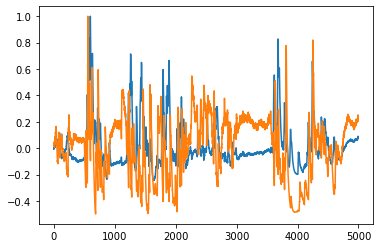

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\B192-B197\B194Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\B192-B197\DataB194ss1244TSGoodIC.mat


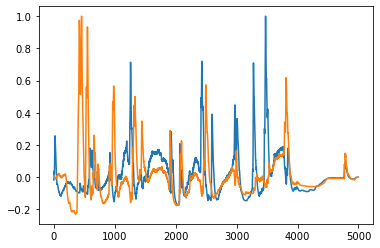

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6F\GSB5-100234\100234Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6F\GSB5-100234\GSB5_psfproj_dff_kf_350ICs_TSGoodIC.mat


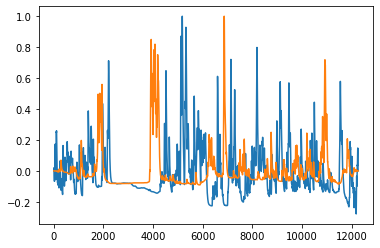

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6F\GSB7-100609\100609Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6F\GSB7-100609\GSB7_psfproj_dff_kf_232ICs_TSGoodIC.mat


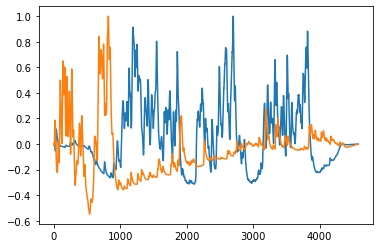

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6s\GSB1-981\981Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6s\GSB1-981\GSB1_psfproj_dff_kf_799ICs_TSGoodIC.mat


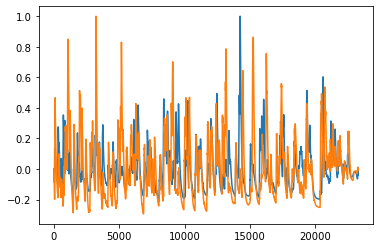

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\GMR6s\GSB3_100133\100133Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\GMR6s\GSB3_100133\GSB3_psfproj_dff_kf_599ICs_TSGoodIC.mat


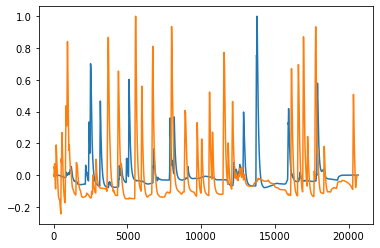

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\7s\B991-B1002\B993Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\7s\B991-B1002\DataB993ss1reg238TSGoodIC.mat


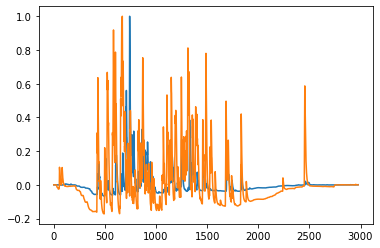

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\GMRNsyb6s\B1037-B1050\B1037Dir1_950kd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\GMRNsyb6s\B1037-B1050\DataB1037ss1reg310TSGoodIC.mat


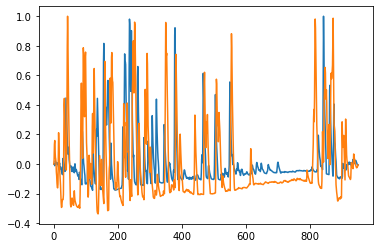

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\GMRNsyb6s\B1037-B1050\B1047Dir1_1500kd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\GMRNsyb6s\B1037-B1050\DataB1047ss1reg218TSGoodIC.mat


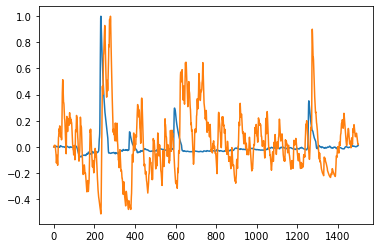

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\syt6s\358-359-360\359Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\syt6s\358-359-360\Data359ss1reg224TSGoodIC.mat


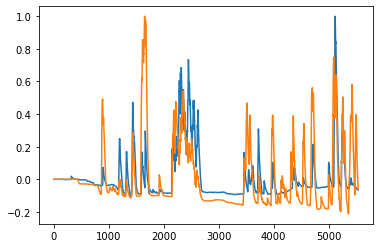

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\syt6s\368-369\369Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\syt6s\368-369\Data369ss1reg230TSGoodIC.mat


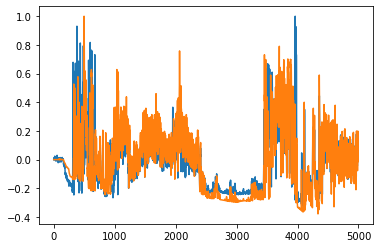

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\syt6s\370\370Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\syt6s\370\Data370reg150Smith20_4_64TSGoodIC.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\syt6s\370\371Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\syt6s\370\Data371ss1regc268Smith20_4_158TSGoodIC.mat


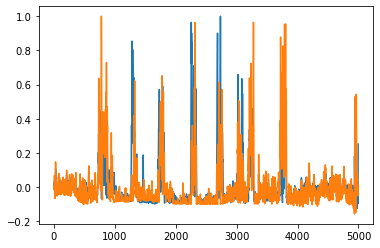

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\syt6s\370\372Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\syt6s\370\Data372ss1regcdFF2000pointskf300TSGoodIC.mat


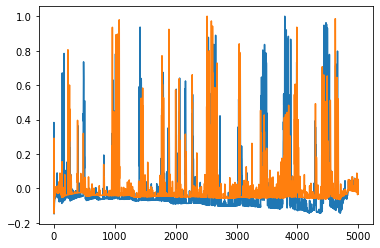

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\syt6s\B1070\B1070Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\syt6s\B1070\DataB1070ss1reg256TSGoodIC.mat


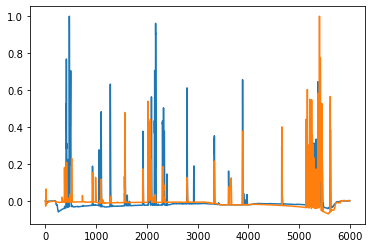

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\syt6s\B1125-B1129\B1125Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\syt6s\B1125-B1129\DataB1125ss1reg356TSGoodIC.mat


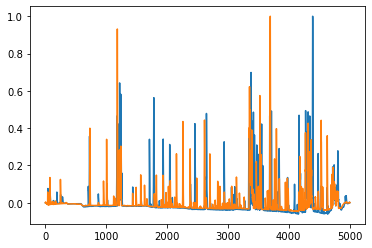

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\syt6s\B1125-B1129\B1126Dir1_1800kd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\syt6s\B1125-B1129\DataB1126ss1reg332TSGoodIC.mat


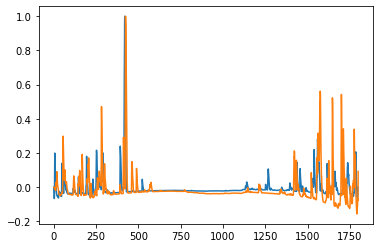

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\syt6s\B1125-B1129\B1128Dir1_1500kd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\syt6s\B1125-B1129\DataB1128ss1reg330TSGoodIC.mat


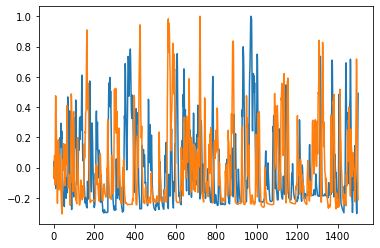

Z:\GrunwaldKadow_group\Sophie\WalkProject\Cha\773\773Turnkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Cha\773\773ss2onc500regcU15sMpsfkfint184TSGoodIC.mat


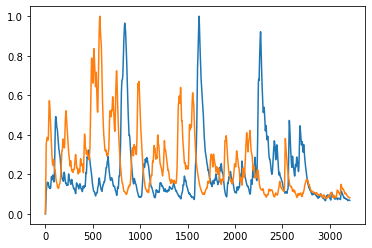

Z:\GrunwaldKadow_group\Sophie\WalkProject\Cha\100160\100160Turnkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Cha\100160\100160ss2onc500reg198TSGoodIC.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Cha\B1072-B1076\B1073Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Cha\B1072-B1076\DataB1073ss1reg260TSGoodIC.mat


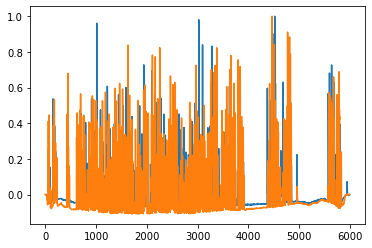

Z:\GrunwaldKadow_group\Sophie\WalkProject\Gad\B140-B141\B140DirTL-Rkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Gad\B140-B141\DataB140ss1reg252TSGoodIC.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\TH\107\107Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\TH\107\Data107ss2regcdFF1000pointskf152Smith0_4_60TSGoodIC.mat


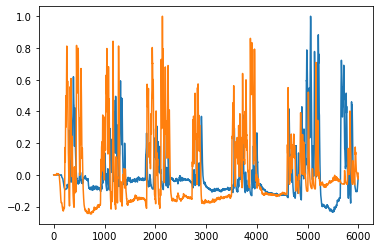

Z:\GrunwaldKadow_group\Sophie\WalkProject\TH\100142\100142Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\TH\100142\100142ss2oncregcdFF20spsfkf108TSGoodIC.mat


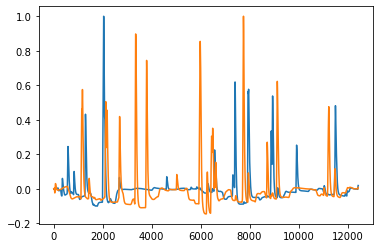

Z:\GrunwaldKadow_group\Sophie\WalkProject\TH\100404\100405Dirkd1000_2000kd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\TH\100404\100405seriesint252Smith0_4_60TSGoodIC.mat


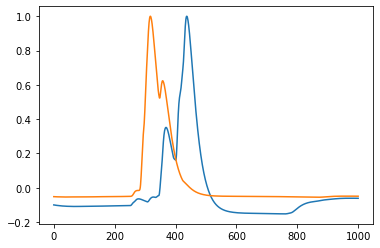

Z:\GrunwaldKadow_group\Sophie\WalkProject\TH\100411\100411Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\TH\100411\100411seriesdffkf240Smith0_4_60TSGoodIC.mat


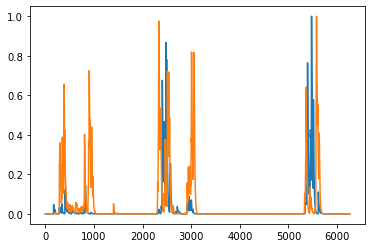

Z:\GrunwaldKadow_group\Sophie\WalkProject\TH\100455Series\100455Dirkd1_5000kd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\TH\100455Series\Data100455ss2conregdFF20skfconcatcc188TSGoodIC.mat


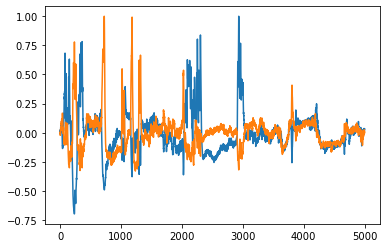

Z:\GrunwaldKadow_group\Sophie\WalkProject\TH\100597series\100597Dir1_9500kd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\TH\100597series\Data100597ss2cto30regdFF20skfconcat222Smith0_4_60TSGoodIC.mat


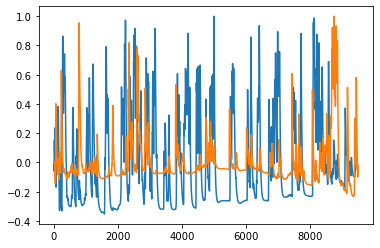

Z:\GrunwaldKadow_group\Sophie\WalkProject\TH\100621series\100621ss2seriesDir1_5990kd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\TH\100621series\100621ss2oncregcdFF20skfconcat146TSGoodIC.mat


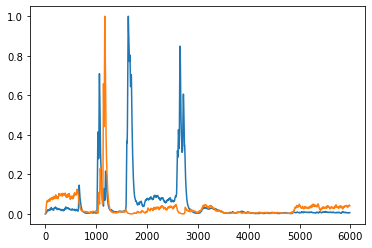

Z:\GrunwaldKadow_group\Sophie\WalkProject\TH\B369-B380\Fly1\B370Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\TH\B369-B380\Fly1\DataB370ss1reg190TSGoodIC.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\TH\B369-B380\Fly2\B373Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\TH\B369-B380\Fly2\DataB373ss1reg254TSGoodIC.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\TH\B361-B362-forced\B365Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\TH\B361-B362-forced\DataB365ss1reg206TSGoodIC.mat


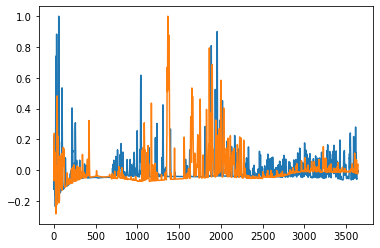

Z:\GrunwaldKadow_group\Sophie\WalkProject\Trh\B97-B98\B97Turnkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Trh\B97-B98\DataB97ss1reg150TSGoodIC.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Trh\B122-B124\B122Turnkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Trh\B122-B124\DataB122ss1regcdFF4000pointskf146TSGoodIC.mat


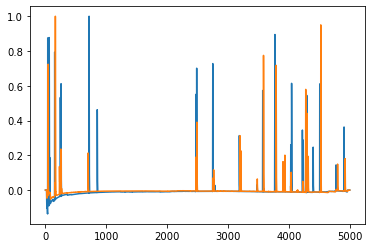

Z:\GrunwaldKadow_group\Sophie\WalkProject\Trh\B122-B124\B123Turnkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Trh\B122-B124\DataB123ss1regcdFF4000pointskf86TSGoodIC.mat


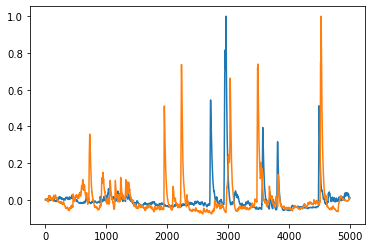

Z:\GrunwaldKadow_group\Sophie\WalkProject\Trh\B122-B124\B124Turnkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Trh\B122-B124\DataB124ss1reg90TSGoodIC.mat


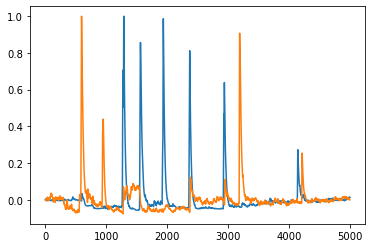

Z:\GrunwaldKadow_group\Sophie\WalkProject\Trh\B151-B152\B152_700-endTurnkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Trh\B151-B152\DataB152ss1regcdFF4000pointskf202TSGoodIC.mat


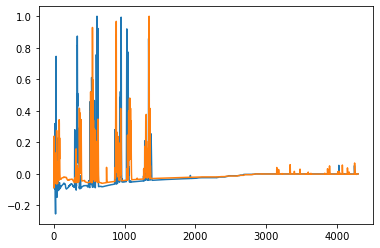

Z:\GrunwaldKadow_group\Sophie\WalkProject\Trh\B155-B159\B155Turnkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Trh\B155-B159\DataB155ss1reg138TSGoodIC.mat


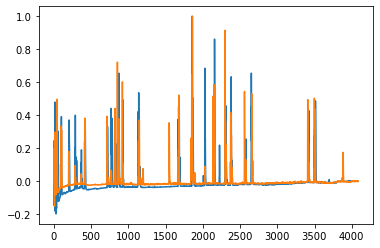

Z:\GrunwaldKadow_group\Sophie\WalkProject\Trh\B155-B159\B156Turnkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Trh\B155-B159\DataB156ss1reg72TSGoodIC.mat


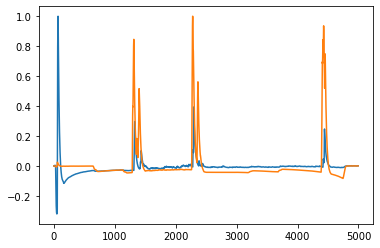

Z:\GrunwaldKadow_group\Sophie\WalkProject\Trh\B155-B159\B158Turnkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Trh\B155-B159\DataB158ss1reg74TSGoodIC.mat


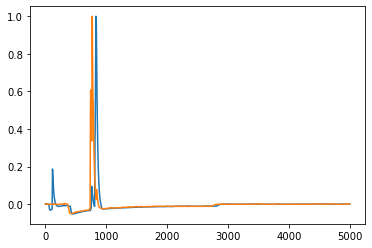

Z:\GrunwaldKadow_group\Sophie\WalkProject\Trh\B343-B350-forced-and-spont\B350_1to3000Dirkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Trh\B343-B350-forced-and-spont\DataB350ss1reg156TSGoodIC.mat


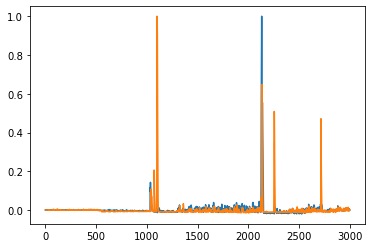

Z:\GrunwaldKadow_group\Sophie\WalkProject\Trh\B1061-B1066\B1066Turnto4600kd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Trh\B1061-B1066\DataB1066ss1reg238TSGoodIC.mat


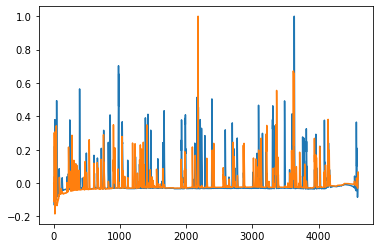

Z:\GrunwaldKadow_group\Sophie\WalkProject\Trh\B1275-B1276\B1276Dir1_500kd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Trh\B1275-B1276\DataB1276ss1reg134TSGoodIC.mat


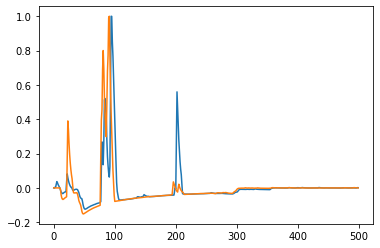

Z:\GrunwaldKadow_group\Sophie\WalkProject\TDC\B217-B219\B219_1to2000_Turnkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\TDC\B217-B219\DataB219ss1reg180TSGoodIC.mat


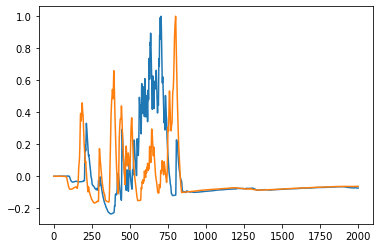

Z:\GrunwaldKadow_group\Sophie\WalkProject\TDC\B266\B266Turnkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\TDC\B266\DataB266ss1reg174TSGoodIC.mat


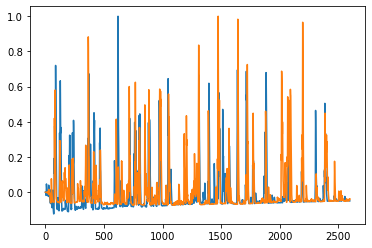

Z:\GrunwaldKadow_group\Sophie\WalkProject\TDC\B303-B305\B305Turnkd1-2500kd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\TDC\B303-B305\DataB305ss1reg122TSGoodIC.mat


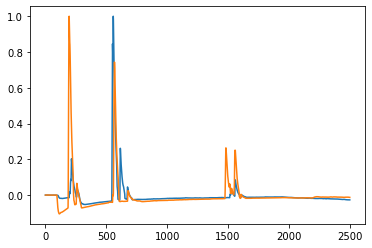

Z:\GrunwaldKadow_group\Sophie\WalkProject\TDC\B695-B697-B698\B696Turnkd3500-4576kd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\TDC\B695-B697-B698\DataB696ss1regon172TSGoodIC.mat


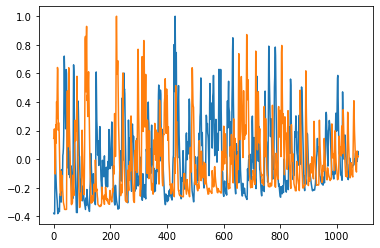

Z:\GrunwaldKadow_group\Sophie\WalkProject\TDC\B700-B703\B700Dir100-3100kd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\TDC\B700-B703\DataB700ss1regon240TSGoodIC.mat


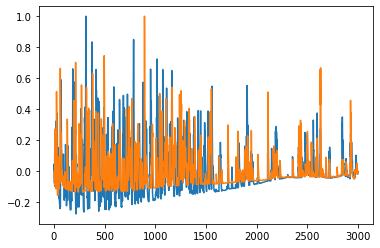

Z:\GrunwaldKadow_group\Sophie\WalkProject\TDC\B1250-54\B1252_400_1670Dirkd.mat


In [24]:
for i in range(GoodICFiles.shape[0]):    
#for i in range(167,168):
    try:
        if GoodICFiles.iloc[i]['TurnRegressor'] != '':  
            print(GoodICFiles.iloc[i]['TurnRegressor'])
            L_R=loadmat(GoodICFiles.iloc[i]['TSfile'].replace('/','\\').replace('\\media\\NAS','Z:\\GrunwaldKadow_group').replace('.mat','GoodIC_L_Rratio.mat'))['L_Rratio']
            TS=loadmat(GoodICFiles.iloc[i]['TSfile'].replace('/','\\').replace('\\media\\NAS','Z:\\GrunwaldKadow_group').replace('.mat','GoodIC.mat'))['TSgoodIC']
            print(GoodICFiles.iloc[i]['TSfile'].replace('/','\\').replace('\\media\\NAS','Z:\\GrunwaldKadow_group').replace('.mat','GoodIC.mat'))
            RegressorL=loadmat(GoodICFiles.iloc[i]['TurnRegressor'])['Leftkd']
            RegressorR=loadmat(GoodICFiles.iloc[i]['TurnRegressor'])['Rightkd']

            # Fix dimension mismatches
            if RegressorL.shape[0]<RegressorL.shape[1]:
                RegressorR=RegressorR.T
                RegressorL=RegressorL.T    
            if TS.shape[0]>TS.shape[1]:
                TS=TS.T            
            if TS.shape[1]==(RegressorL.shape[0]+2):
                TS=TS[:,1:RegressorL.shape[0]+1]
            if TS.shape[1]==(RegressorL.shape[0]+1):
                TS=TS[:,1:RegressorL.shape[0]]            
            if TS.shape[1]==(RegressorL.shape[0]+3):
                TS=TS[:,2:RegressorL.shape[0]-1]    
            if TS.shape[1]==(RegressorL.shape[0]-1):
                RegressorL=RegressorL[1:RegressorL.shape[0]]    
                RegressorR=RegressorR[1:RegressorR.shape[0]]
            if TS.shape[1]==(RegressorL.shape[0]-2):
                RegressorL=RegressorL[1:RegressorL.shape[0]-1]   
                RegressorR=RegressorR[1:RegressorR.shape[0]-1] 
            if TS.shape[1]==(RegressorL.shape[0]-3):
                RegressorL=RegressorL[2:RegressorL.shape[0]-1] 
                RegressorR=RegressorR[2:RegressorR.shape[0]-1] 
            if TS.shape[1]==(RegressorL.shape[0]-4):
                RegressorL=RegressorL[2:RegressorL.shape[0]-2]  
                RegressorR=RegressorR[2:RegressorR.shape[0]-2]  
            if TS.shape[1]!=(RegressorL.shape[0]):    
                TS=TS[:,int(GoodICFiles.iloc[i]['TSlowlimWalk']):int(GoodICFiles.iloc[i]['TShighlimWalk']+1)]
            if TS.shape[1]==(RegressorL.shape[0]-1):
                RegressorL=RegressorL[1:RegressorL.shape[0]]  
                RegressorR=RegressorR[1:RegressorR.shape[0]]  
            if TS.shape[1]==(RegressorL.shape[0]+2):
                TS=TS[:,1:RegressorL.shape[0]+1]
            if TS.shape[1]==(RegressorL.shape[0]+1):
                TS=TS[:,0:RegressorL.shape[0]] 

            Mrl=np.nanmax(np.nanmax(abs(RegressorL.T)))
            Mrr=np.nanmax(np.nanmax(abs(RegressorR.T)))            
            
            if len(L_R[0])==1:
                Compdf.loc[Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']]['CoefTurnipsi']=np.nan
                Compdf.loc[Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']]['R2Turnipsi']=np.nan
                Compdf.loc[Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']]['CoefTurncontra']=np.nan
                Compdf.loc[Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']]['R2Turncontra']=np.nan        
                k=k+1
            else:
                RegressorL=RegressorL/Mrl
                RegressorR=RegressorR/Mrr                
                plt.plot(RegressorL)
                plt.plot(RegressorR)
                plt.show()
                dfLmRreg=pd.DataFrame(data=np.vstack((np.squeeze(RegressorL.T),np.squeeze(RegressorR.T))).T, index=range(TS.shape[1]), columns=['L','R'])

                resultLmRreg = smf.ols(formula="L ~ R", data=dfLmRreg).fit() 
                
                
                for j in range(len(TS)):
                    if ('flip' in GoodICFiles.iloc[i]['Templatefile'] or 'Flip' in GoodICFiles.iloc[i]['Templatefile']):
                        L_R[0,j]=1/L_R[0,j]

                    dfL=pd.DataFrame(data=np.vstack((TS[j,:],np.squeeze(RegressorL.T))).T, index=range(TS.shape[1]), columns=['TS','Reg'])
                    resultL = smf.ols(formula="TS ~ Reg", data=dfL).fit()
                    dfR=pd.DataFrame(data=np.vstack((TS[j,:],np.squeeze(RegressorR.T))).T, index=range(TS.shape[1]), columns=['TS','Reg'])
                    resultR = smf.ols(formula="TS ~ Reg", data=dfR).fit()
                    dfLmR=pd.DataFrame(data=np.vstack((TS[j,:],np.squeeze(RegressorL.T)-np.squeeze(RegressorR.T))).T, index=range(TS.shape[1]), columns=['TS','Reg'])
                    resultLmR = smf.ols(formula="TS ~ Reg", data=dfLmR).fit()                    

                    if L_R[0,j]>1.5:
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['L_R']]=L_R[0,j]
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['CoefTurn_ipsi']]=resultL.params[1]
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['R2Turn_ipsi']]=resultL.rsquared
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['CoefTurn_contra']]=resultR.params[1]
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['R2Turn_contra']]=resultR.rsquared
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['CoefIpsi_contra']]=resultLmR.params[1]
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['R2Ipsi_contra']]=resultLmR.rsquared
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['Coefipsi_Coefcontra']]=-resultR.params[1]+resultL.params[1]
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['R2ipsi_R2contra']]=-resultR.rsquared+resultL.rsquared   
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['R2Ipsi_contra']]=-resultLmR.rsquared

                    if L_R[0,j]<(1/1.5):
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['L_R']]=L_R[0,j]
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['CoefTurn_ipsi']]=resultR.params[1]
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['R2Turn_ipsi']]=resultR.rsquared
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['CoefTurn_contra']]=resultL.params[1]
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['R2Turn_contra']]=resultL.rsquared
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['CoefIpsi_contra']]=-resultLmR.params[1]
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['Coefipsi_Coefcontra']]=resultR.params[1]-resultL.params[1]
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['R2ipsi_R2contra']]=resultR.rsquared-resultL.rsquared

                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['R2Ipsi_contra']]=resultLmR.rsquared

#                     if resultLmRreg.params[1]>0:
#                         Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['CoefTurn_ipsi']]=np.nan
#                         Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['R2Turn_ipsi']]=np.nan
#                         Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['CoefTurn_contra']]=np.nan
#                         Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['R2Turn_contra']]=np.nan
#                         Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['CoefIpsi-contra']]=np.nan
#                         Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['Coefipsi-Coefcontra']]=np.nan
#                         Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['R2ipsi-R2contra']]=np.nan

#                         Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['R2Ipsi-contra']]=np.nan


                    k=k+1

                del TS
    except:
            continue   
                    # Regress here, cross corr...

In [25]:
for i in range(GoodICFiles.shape[0]):
    try:
        if GoodICFiles.iloc[i]['ForcedTurnRegressor'] != '':    
            L_R=loadmat(GoodICFiles.iloc[i]['TSfile'].replace('/','\\').replace('\\media\\NAS','Z:\\GrunwaldKadow_group').replace('.mat','GoodIC_L_Rratio.mat'))['L_Rratio']
            TS=loadmat(GoodICFiles.iloc[i]['TSfile'].replace('/','\\').replace('\\media\\NAS','Z:\\GrunwaldKadow_group').replace('.mat','GoodIC.mat'))['TSgoodIC']


            RegressorL=loadmat(GoodICFiles.iloc[i]['ForcedTurnRegressor'])['Leftkd']
            RegressorR=loadmat(GoodICFiles.iloc[i]['ForcedTurnRegressor'])['Rightkd']
            if RegressorL.shape[0]<RegressorL.shape[1]:
                RegressorR=RegressorR.T
                RegressorL=RegressorL.T    
            if TS.shape[0]>TS.shape[1]:
                TS=TS.T            
            if TS.shape[1]==(RegressorL.shape[0]+2):
                TS=TS[:,1:RegressorL.shape[0]+1]
            if TS.shape[1]==(RegressorL.shape[0]+1):
                TS=TS[:,1:RegressorL.shape[0]]            
            if TS.shape[1]==(RegressorL.shape[0]+3):
                TS=TS[:,2:RegressorL.shape[0]-1]    
            if TS.shape[1]==(RegressorL.shape[0]-1):
                RegressorL=RegressorL[1:RegressorL.shape[0]]    
                RegressorR=RegressorR[1:RegressorR.shape[0]]
            if TS.shape[1]==(RegressorL.shape[0]-2):
                RegressorL=RegressorL[1:RegressorL.shape[0]-1]   
                RegressorR=RegressorR[1:RegressorR.shape[0]-1] 
            if TS.shape[1]==(RegressorL.shape[0]-3):
                RegressorL=RegressorL[2:RegressorL.shape[0]-1] 
                RegressorR=RegressorR[2:RegressorR.shape[0]-1] 
            if TS.shape[1]==(RegressorL.shape[0]-4):
                RegressorL=RegressorL[2:RegressorL.shape[0]-2]  
                RegressorR=RegressorR[2:RegressorR.shape[0]-2]  
            if TS.shape[1]!=(RegressorL.shape[0]):    
                TS=TS[:,int(GoodICFiles.iloc[i]['TSlowlimWalk']):int(GoodICFiles.iloc[i]['TShighlimWalk']+1)]
            if TS.shape[1]==(RegressorL.shape[0]-1):
                RegressorL=RegressorL[1:RegressorL.shape[0]]  
                RegressorR=RegressorR[1:RegressorR.shape[0]]  
            if TS.shape[1]==(RegressorL.shape[0]+2):
                TS=TS[:,1:RegressorL.shape[0]+1]
            if TS.shape[1]==(RegressorL.shape[0]+1):
                TS=TS[:,0:RegressorL.shape[0]] 
                
            if len(L_R[0])==1:
                Compdf.loc[Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']]['CoefForcedTurnipsi']=np.nan
                Compdf.loc[Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']]['R2ForcedTurnipsi']=np.nan
                Compdf.loc[Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']]['CoefForcedTurncontra']=np.nan
                Compdf.loc[Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']]['R2ForcedTurncontra']=np.nan        
                k=k+1
            else:
                Mrl=np.nanmax(np.nanmax(abs(RegressorL.T)))
                Mrr=np.nanmax(np.nanmax(abs(RegressorR.T)))   
                RegressorL=RegressorL/Mrl
                RegressorR=RegressorR/Mrr   
                print(GoodICFiles.iloc[i]['ForcedTurnRegressor'])
                for j in range(len(TS)):
                    if ('flip' in GoodICFiles.iloc[i]['Templatefile'] or 'Flip' in GoodICFiles.iloc[i]['Templatefile']):
                        L_R[0,j]=1/L_R[0,j]
                    TS[j,:]=TS[j,:]/max(abs(TS[j,:]))
                    dfL=pd.DataFrame(data=np.vstack((TS[j,:],np.squeeze(RegressorL.T))).T, index=range(TS.shape[1]), columns=['TS','Reg'])
                    resultL = smf.ols(formula="TS ~ Reg", data=dfL).fit()
                    dfR=pd.DataFrame(data=np.vstack((TS[j,:],np.squeeze(RegressorR.T))).T, index=range(TS.shape[1]), columns=['TS','Reg'])
                    resultR = smf.ols(formula="TS ~ Reg", data=dfR).fit()

                    if L_R[0,j]>1.5:
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['L_R']]=L_R[0,j]
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['CoefForcedTurnipsi']]=resultL.params[1]
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['R2ForcedTurnipsi']]=resultL.rsquared
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['CoefForcedTurncontra']]=resultR.params[1]
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['R2ForcedTurncontra']]=resultR.rsquared
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['CoeffForcedIpsi_contra']]=resultL.params[1]-resultR.params[1]
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['R2fForcedIpsi_contra']]=resultL.rsquared-resultR.rsquared
                    if L_R[0,j]<(1/1.5):
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['L_R']]=L_R[0,j]
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['CoefForcedTurnipsi']]=resultR.params[1]
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['R2ForcedTurnipsi']]=resultR.rsquared
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['CoefForcedTurncontra']]=resultL.params[1]
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['R2ForcedTurncontra']]=resultL.rsquared
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['CoeffForcedIpsi_contra']]=resultR.params[1]-resultL.params[1]
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['R2fForcedIpsi_contra']]=resultR.rsquared-resultL.rsquared

                    k=k+1

                del TS
    except:
        continue   

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\GMRNsyb6s\B322-B323\B322ForcedLRkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\GMRNsyb6s\B1037-B1050\B1043ForcedLR2_1077kd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\B677-B679\B677ForcedLRkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\B902-B905\B903ForcedLRkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\B902-B905\B905ForcedLRkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\TH\B369-B380\Fly2\B377ForcedLRkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\TH\B369-B380\Fly1\B378_1_1700ForcedLRkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\TH\B764-b768-forced\B765ForcedLRkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\TH\B764-b768-forced\B766ForcedLRkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\TH\B764-b768-forced\B767ForcedLRkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\TH\B764-b768-forced\B768ForcedLRkd.mat
Z:\Gru

In [26]:
Compdf.to_pickle("Compdf.pkl")
Regionsdf.to_pickle("Regionsdf.pkl")

Compdf.to_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\Compdf.pkl")
Regionsdf.to_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\Regionsdf.pkl")

## Walk Components

In [27]:
GoodICFiles.loc[GoodICFiles.index==0,'TSlowlimWalk']=0
GoodICFiles.loc[GoodICFiles.index==0,'TShighlimWalk']=4999
GoodICFiles.loc[GoodICFiles.index==126,'TSlowlimWalk']=1
GoodICFiles.loc[GoodICFiles.index==130,'TSlowlimWalk']=1
GoodICFiles.loc[GoodICFiles.index==130,'TShighlimWalk']=3000

In [28]:
Compdf['CoefWalk']=np.nan
Compdf['R2Walk']=np.nan
k=0

In [29]:
for i in range(GoodICFiles.shape[0]):
#for i in range(1):
    try:
        if GoodICFiles.iloc[i]['WalkRegressor'] != '':

            TS=loadmat(GoodICFiles.iloc[i]['TSfile'].replace('/','\\').replace('\\media\\NAS','Z:\\GrunwaldKadow_group').replace('.mat','GoodIC.mat'))['TSgoodIC']
            Regressor=loadmat(GoodICFiles.iloc[i]['WalkRegressor'])['Rkd']
            if Regressor.shape[0]<Regressor.shape[1]:
                Regressor=Regressor.T
            if TS.shape[0]>TS.shape[1]:
                TS=TS.T            
            if TS.shape[1]==(Regressor.shape[0]+2):
                TS=TS[:,1:Regressor.shape[0]+1]
            if TS.shape[1]==(Regressor.shape[0]+1):
                TS=TS[:,1:Regressor.shape[0]]            
            if TS.shape[1]==(Regressor.shape[0]+3):
                TS=TS[:,2:Regressor.shape[0]-1]    
            if TS.shape[1]==(Regressor.shape[0]-1):
                Regressor=Regressor[1:Regressor.shape[0]]    

            if TS.shape[1]==(Regressor.shape[0]-2):
                Regressor=Regressor[1:Regressor.shape[0]-1]    
            if TS.shape[1]==(Regressor.shape[0]-3):
                Regressor=Regressor[2:Regressor.shape[0]-1] 
            if TS.shape[1]==(Regressor.shape[0]-4):
                Regressor=Regressor[2:Regressor.shape[0]-2]    
            if TS.shape[1]==(Regressor.shape[0]-5):
                Regressor=Regressor[2:Regressor.shape[0]-3]                  
            if TS.shape[1]==(Regressor.shape[0]+6):
                TS=TS[:,3:TS.shape[1]-3]      
            if TS.shape[1]!=(Regressor.shape[0]):    
                TS=TS[:,int(GoodICFiles.iloc[i]['TSlowlimWalk']):int(GoodICFiles.iloc[i]['TShighlimWalk']+1)]
            if TS.shape[1]!=(Regressor.shape[0]):    
                Regressor=Regressor[int(GoodICFiles.iloc[i]['TSlowlimWalk']):int(GoodICFiles.iloc[i]['TShighlimWalk']+1)]                
            if TS.shape[1]==(Regressor.shape[0]-1):
                Regressor=Regressor[1:Regressor.shape[0]]    
            if TS.shape[1]==(Regressor.shape[0]+2):
                TS=TS[:,1:Regressor.shape[0]+1]
            if TS.shape[1]==(Regressor.shape[0]+1):
                TS=TS[:,0:Regressor.shape[0]] 


            if len(TS)==1:
                Compdf.loc[Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']]['CoefWalk']=np.nan
                Compdf.loc[Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']]['R2Walk']=np.nan
                k=k+1
            else:
                M=np.nanmax(np.nanmax(abs(TS)))
                Mr=np.nanmax(np.nanmax(abs(Regressor.T)))
                
                for j in range(len(TS)):
                    df=pd.DataFrame(data=np.vstack((TS[j,:]/M,np.squeeze(Regressor.T)/Mr)).T, index=range(TS.shape[1]), columns=['TS','Reg'])
                    result = smf.ols(formula="TS ~ Reg", data=df).fit()
                    result.summary()
                    Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['CoefWalk']]=result.params[1]
                    Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['R2Walk']]=result.rsquared
                    k=k+1
                    del df
                del TS
    except:
         continue   
                    # Regress here, cross corr...

In [30]:
Compdf.to_pickle("Compdf.pkl")
Regionsdf.to_pickle("Regionsdf.pkl")

Compdf.to_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\Compdf.pkl")
Regionsdf.to_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\Regionsdf.pkl")

In [31]:
Compdf['R2Walkbin']=np.nan
Compdf['CoefWalkbin']=np.nan
Compdf['R2Walkbinfill']=np.nan
Compdf['CoefWalkbinfill']=np.nan
Compdf['R2Walkon']=np.nan
Compdf['CoefWalkon']=np.nan
Compdf['R2Walkoff']=np.nan
Compdf['CoefWalkoff']=np.nan

In [32]:
for i in range(0,GoodICFiles.shape[0]):

    try:
        if GoodICFiles.iloc[i]['WalkRegressor'] != '':

            TS=loadmat(GoodICFiles.iloc[i]['TSfile'].replace('/','\\').replace('\\media\\NAS','Z:\\GrunwaldKadow_group').replace('.mat','GoodIC.mat'))['TSgoodIC']

            
            try:
                Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('kd',''))['R']
            except:
                try:
                    Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('kd',''))['Rwalk']
                except:
                    try:
                        Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('WalkRbinkd','Rbin'))['R']
                    except:
                        try:
                            Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('Rbinkd','Rbin'))['Rbin']
                        except:
                            Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('kd',''))['Rbin']
            
            if Regressor.shape[0]<Regressor.shape[1]:
                Regressor=Regressor.T
            if TS.shape[0]>TS.shape[1]:
                TS=TS.T            
            if TS.shape[1]==(Regressor.shape[0]+2):
                TS=TS[:,1:Regressor.shape[0]+1]
            if TS.shape[1]==(Regressor.shape[0]+1):
                TS=TS[:,1:Regressor.shape[0]]            
            if TS.shape[1]==(Regressor.shape[0]+3):
                TS=TS[:,2:Regressor.shape[0]-1]    
            if TS.shape[1]==(Regressor.shape[0]-1):
                Regressor=Regressor[1:Regressor.shape[0]]    

            if TS.shape[1]==(Regressor.shape[0]-2):
                Regressor=Regressor[1:Regressor.shape[0]-1]    
            if TS.shape[1]==(Regressor.shape[0]-3):
                Regressor=Regressor[2:Regressor.shape[0]-1] 
            if TS.shape[1]==(Regressor.shape[0]-4):
                Regressor=Regressor[2:Regressor.shape[0]-2]    
            if TS.shape[1]==(Regressor.shape[0]-5):
                Regressor=Regressor[2:Regressor.shape[0]-3]                  
            if TS.shape[1]==(Regressor.shape[0]+6):
                TS=TS[:,3:TS.shape[1]-3]   
            if TS.shape[1]==(Regressor.shape[0]-11):
                Regressor=Regressor[5:Regressor.shape[0]-6]  
            if TS.shape[1]<Regressor.shape[0]:    
                Regressor=Regressor[int(GoodICFiles.iloc[i]['TSlowlimWalk']):int(GoodICFiles.iloc[i]['TShighlimWalk']+1)]     
            if TS.shape[1]>Regressor.shape[0]:    
                TS=TS[:,int(GoodICFiles.iloc[i]['TSlowlimWalk']):int(GoodICFiles.iloc[i]['TShighlimWalk']+1)]
           
            if TS.shape[1]==(Regressor.shape[0]-1):
                Regressor=Regressor[1:Regressor.shape[0]]    
            if TS.shape[1]==(Regressor.shape[0]+2):
                TS=TS[:,1:Regressor.shape[0]+1]
            if TS.shape[1]==(Regressor.shape[0]+1):
                TS=TS[:,0:Regressor.shape[0]] 

            Ron=loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('.mat','Ron_and_Roffkd_and_Rbinfilledkd.mat'))['Ronkd']
            Regressor=loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('.mat','Ron_and_Roffkd_and_Rbinfilledkd.mat'))['Rbinkd']
            Roff=loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('.mat','Ron_and_Roffkd_and_Rbinfilledkd.mat'))['Roffkd'] 

            
            FR=GoodICFiles.iloc[i]['FR']
            if len(TS)!=1 and pd.isnull(FR)==False:                     

                M=np.nanmax(np.nanmax(abs(TS)))
                for j in range(TS.shape[0]):

                        df=pd.DataFrame(data=np.vstack((TS[j,:]/M,np.squeeze(Regressor.T[0:TS.shape[1]]))).T, index=range(TS.shape[1]), columns=['TS','Reg'])
                        result = smf.ols(formula="TS ~ Reg", data=df).fit()
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['CoefWalkbin']]=result.params[1]
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['R2Walkbin']]=result.rsquared

                        df=pd.DataFrame(data=np.vstack((TS[j,:]/M,np.squeeze(Ron).T[0:TS.shape[1]])).T, index=range(TS.shape[1]), columns=['TS','Reg'])
                        result = smf.ols(formula="TS ~ Reg", data=df).fit()
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['CoefWalkon']]=result.params[1]
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['R2Walkon']]=result.rsquared

                        df=pd.DataFrame(data=np.vstack((TS[j,:]/M,np.squeeze(Roff).T[0:TS.shape[1]])).T, index=range(TS.shape[1]), columns=['TS','Reg'])
                        result = smf.ols(formula="TS ~ Reg", data=df).fit()
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['CoefWalkoff']]=result.params[1]
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['R2Walkoff']]=result.rsquared


                del TS
                
    except:
         continue   


In [33]:
Compdf.to_pickle("Compdf.pkl")
Regionsdf.to_pickle("Regionsdf.pkl")


Compdf.to_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\Compdf.pkl")
Regionsdf.to_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\Regionsdf.pkl")


## Walk Regions

In [34]:
GoodICFiles=pd.read_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\GoodICsdf.pkl")

In [35]:
Regionsdf=pd.read_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\Regionsdf.pkl")

In [36]:
T87_75=loadmat('C:\\Users\\Soso\\Documents\\GitHub\\FlyLFM\\MatlabFiles\\CompareConditions\\87to75.mat')['VarName3']

In [37]:
Regionsdf['R2Walk']=np.nan
Regionsdf['CoefWalk']=np.nan


In [38]:
GoodICFiles.shape[0]

271

In [39]:
GoodICFiles.iloc[20]['RegionFile']

'Z:\\GrunwaldKadow_group\\Sophie\\WalkProject\\Pan-NeuronalCalcium\\Nsyb6M\\B39-44\\DataB41ss1regcdFF4000pointskfTS_LR.mat'

In [40]:
for i in range(GoodICFiles.shape[0]):
#for i in range(2):    
   # try:
        print(GoodICFiles.iloc[i]['RegionFile'])
        if GoodICFiles.iloc[i]['WalkRegressor'] != '':
            if GoodICFiles.iloc[i]['RegionFile'] != '':
                print(GoodICFiles.iloc[i]['expID'])
                print(GoodICFiles.iloc[i]['WalkRegressor'])
                TS=loadmat(GoodICFiles.iloc[i]['RegionFile'])['TS']
                Regressor=loadmat(GoodICFiles.iloc[i]['WalkRegressor'])['Rkd']
                if Regressor.shape[0]<Regressor.shape[1]:
                    Regressor=Regressor.T
                if TS.shape[0]>TS.shape[1]:
                    TS=TS.T            
                if TS.shape[1]==(Regressor.shape[0]+2):
                    TS=TS[:,1:Regressor.shape[0]+1]
                if TS.shape[1]==(Regressor.shape[0]+1):
                    TS=TS[:,1:Regressor.shape[0]]            
                if TS.shape[1]==(Regressor.shape[0]+3):
                    TS=TS[:,2:Regressor.shape[0]-1]    
                if TS.shape[1]==(Regressor.shape[0]-1):
                    Regressor=Regressor[1:Regressor.shape[0]]    

                if TS.shape[1]==(Regressor.shape[0]-2):
                    Regressor=Regressor[1:Regressor.shape[0]-1]    
                if TS.shape[1]==(Regressor.shape[0]-3):
                    Regressor=Regressor[2:Regressor.shape[0]-1] 
                if TS.shape[1]==(Regressor.shape[0]-4):
                    Regressor=Regressor[2:Regressor.shape[0]-2]                 
                if TS.shape[1]==(Regressor.shape[0]-1):
                    Regressor=Regressor[1:Regressor.shape[0]]    
                if TS.shape[1]==(Regressor.shape[0]-6):
                    Regressor=Regressor[3:Regressor.shape[0]-3]                        
                if TS.shape[1]==(Regressor.shape[0]+2):
                    TS=TS[:,1:Regressor.shape[0]+1]
                if TS.shape[1]==(Regressor.shape[0]+1):
                    TS=TS[:,0:Regressor.shape[0]]                 

                print(TS.shape)
                print(np.squeeze(Regressor.T).shape)                  
                if TS.shape[1]!=(Regressor.shape[0]): 
                    
                    TS=TS[:,int(GoodICFiles.iloc[i]['TSlowlimWalk']):int(GoodICFiles.iloc[i]['TShighlimWalk']+1)]
                if Regressor.shape[0]<Regressor.shape[1]:
                    Regressor=Regressor.T
     
                if TS.shape[1]==(Regressor.shape[0]+2):
                    TS=TS[:,1:Regressor.shape[0]+1]
                if TS.shape[1]==(Regressor.shape[0]+1):
                    TS=TS[:,1:Regressor.shape[0]]            
                if TS.shape[1]==(Regressor.shape[0]+3):
                    TS=TS[:,2:Regressor.shape[0]-1]    
                if TS.shape[1]==(Regressor.shape[0]-1):
                    Regressor=Regressor[1:Regressor.shape[0]]    

                if TS.shape[1]==(Regressor.shape[0]-2):
                    Regressor=Regressor[1:Regressor.shape[0]-1]    
                if TS.shape[1]==(Regressor.shape[0]-3):
                    Regressor=Regressor[2:Regressor.shape[0]-1] 
                if TS.shape[1]==(Regressor.shape[0]-4):
                    Regressor=Regressor[2:Regressor.shape[0]-2]                 
                if TS.shape[1]==(Regressor.shape[0]-1):
                    Regressor=Regressor[1:Regressor.shape[0]]    
                if TS.shape[1]==(Regressor.shape[0]-6):
                    Regressor=Regressor[3:Regressor.shape[0]-3]                        
                if TS.shape[1]==(Regressor.shape[0]+2):
                    TS=TS[:,1:Regressor.shape[0]+1]
                if TS.shape[1]==(Regressor.shape[0]+1):
                    TS=TS[:,0:Regressor.shape[0]]  
                    
                print(TS.shape)
                print(np.squeeze(Regressor.T).shape)                           


                if len(TS)==1:
                    Regionsdf.loc[Regionsdf['RegionFile'] == GoodICFiles.iloc[i]['RegionFile']]['CoefWalk']=np.nan
                    Regionsdf.loc[Regionsdf['RegionFile'] == GoodICFiles.iloc[i]['RegionFile']]['R2Walk']=np.nan
                else:
                    
                    if len(TS)==87:
                        TS2=TS
                        TS=np.zeros((75,TS.shape[1]))
                        for j in range(75):
                            TS[j,:]=TS2[T87_75[j][0]-1,:]
                        #print(GoodICFiles.iloc[i]['expID'])
                        
                    Mr=np.nanmax(np.nanmax(abs(Regressor.T)))
                    M=np.nanmax(np.nanmax(abs(TS)))

                    for j in range(75):
                        
                        try:
                            df=pd.DataFrame(data=np.vstack((TS[j,:]/M,np.squeeze(Regressor.T)/Mr)).T, index=range(TS.shape[1]), columns=['TS','Reg'])
                            result = smf.ols(formula="TS ~ Reg", data=df).fit()
                            Regionsdf.loc[(Regionsdf['RegionFile'] == GoodICFiles.iloc[i]['RegionFile']) & (Regionsdf.RegionNum == j),['CoefWalk']]=result.params[1]
                            Regionsdf.loc[(Regionsdf['RegionFile'] == GoodICFiles.iloc[i]['RegionFile']) & (Regionsdf.RegionNum == j),['R2Walk']]=result.rsquared
                        except:
                            continue     

                            del df
                del TS


Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\nsyb7f\216\216ss1TranTS_LR.mat
216
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\nsyb7f\216\216Rbinkd.mat
(75, 5498)
(5498,)
(75, 5498)
(5498,)
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\nsyb7f\244\Data244ss1regcdFF4000pointskfTS_LR.mat

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\7s\100761-100765\100761\Data100761ss1-1-5529dFF4000pointskfTS_LR.mat
100761
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\7s\100761-100765\100761\100761RbinWalkkd.mat
(87, 5523)
(5523,)
(87, 5523)
(5523,)

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\7s\100761-100765\100765\100765seriesregdFF20spsfkf_concat_actuallynotTS_LR.mat


Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\103-105\Data103ss1onregdFF2000pointskfTS_LR.mat
103
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\103-105\103Walkbinkd.mat
(87, 5776)
(5776,)
(87,

(75, 4765)
(1500,)
(75, 1500)
(1500,)
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\GMRNsyb6s\B1037-B1050\DataB1048ss1reg270ICTS_LR.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\GMRNsyb6s\B1037-B1050\DataB1049ss1reg204ICTS_LR.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\GMRNsyb6s\B1037-B1050\DataB1050ss1reg222ICTS_LR.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\7s\B991-B1002\DataB1000ss1reg206ICTS_LR.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\7s\B991-B1002\DataB999ss1reg246ICTS_LR.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\7s\B991-B1002\DataB1002ss1reg118ICTS_LR.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\B675-B676\DataB675ss1reg210ICTS_LR.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\B675-B676\DataB676ss1reg164ICTS_LR.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6s\B1003-B1004\DataB1

Z:\GrunwaldKadow_group\Sophie\WalkProject\Gad\B130-B134\DataB131ss1regdFF4000pointskfTS_LR.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Gad\B130-B134\DataB132ss1regdFF4000pointskfTS_LR.mat
B132
Z:\GrunwaldKadow_group\Sophie\WalkProject\Gad\B130-B134\B132WalkRbinkd.mat
(87, 4996)
(4996,)
(87, 4996)
(4996,)
Z:\GrunwaldKadow_group\Sophie\WalkProject\Gad\B130-B134\DataB133ss1regdFF4000pointskfTS_LR.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Gad\B130-B134\DataB134ss1regdFF4000pointskfTS_LR.mat
B134
Z:\GrunwaldKadow_group\Sophie\WalkProject\Gad\B130-B134\B134WalkRbinkd.mat
(87, 4996)
(4996,)
(87, 4996)
(4996,)
Z:\GrunwaldKadow_group\Sophie\WalkProject\Gad\B140-B141\B140ssTranTS_LR.mat
B140
Z:\GrunwaldKadow_group\Sophie\WalkProject\Gad\B140-B141\B140Walkbinkd.mat
(75, 4996)
(4996,)
(75, 4996)
(4996,)

Z:\GrunwaldKadow_group\Sophie\WalkProject\Gad\B1133-B1134\B1133ssTranTS_LR.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Gad\B1133-B1134\B1134ssTranTS_LR.mat






Z:\GrunwaldKadow_group\Sop

(75, 4996)
(2600,)
(75, 2600)
(2600,)
Z:\GrunwaldKadow_group\Sophie\WalkProject\TDC\B303-B305\B304TransformedTS_LR.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\TDC\B303-B305\B305TransformedTS_LR.mat
B305
Z:\GrunwaldKadow_group\Sophie\WalkProject\TDC\B303-B305\B305Rbinkd1-2500kd.mat
(75, 4996)
(2500,)
(75, 2500)
(2500,)
Z:\GrunwaldKadow_group\Sophie\WalkProject\TDC\B695-B697-B698\B694TransformedTS_LR.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\TDC\B695-B697-B698\B696TransformedTS_LR.mat
B696
Z:\GrunwaldKadow_group\Sophie\WalkProject\TDC\B695-B697-B698\B696Rbinkd3500-4576kd.mat
(75, 4577)
(1077,)
(75, 1077)
(1077,)
Z:\GrunwaldKadow_group\Sophie\WalkProject\TDC\B695-B697-B698\B697TransformedTS_LR.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\TDC\B700-B703\B700TransformedTS_LR.mat
B700
Z:\GrunwaldKadow_group\Sophie\WalkProject\TDC\B700-B703\B700Walkkd100-3100kd.mat
(75, 5998)
(3001,)
(75, 3001)
(3001,)
Z:\GrunwaldKadow_group\Sophie\WalkProject\TDC\B700-B703\B701TransformedTS_LR.mat
Z:\G

In [41]:
Regionsdf['R2Walkbin']=np.nan
Regionsdf['CoefWalkbin']=np.nan
Regionsdf['R2Walkon']=np.nan
Regionsdf['CoefWalkon']=np.nan
Regionsdf['R2Walkoff']=np.nan
Regionsdf['CoefWalkoff']=np.nan

In [42]:
for i in range(GoodICFiles.shape[0]):
#for i in range(i+1,GoodICFiles.shape[0]):
    try:
        if GoodICFiles.iloc[i]['WalkRegressor'] != '':
            if (GoodICFiles.iloc[i]['RegionFile']!=''):
                TS=loadmat(GoodICFiles.iloc[i]['RegionFile'])['TS']
            #TS=loadmat(GoodICFiles.iloc[i]['TSfile'].replace('/','\\').replace('\\media\\NAS','Z:\\GrunwaldKadow_group').replace('.mat','GoodIC.mat'))['TSgoodIC']
            else:
                continue
            try:
                Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('kd',''))['R']
            except:
                try:
                    Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('kd',''))['Rwalk']
                except:
                    try:
                        Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('WalkRbinkd','Rbin'))['R']
                    except:
                        try:
                            Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('Rbinkd','Rbin'))['Rbin']
                        except:
                            Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('kd',''))['Rbin']
            
            if Regressor.shape[0]<Regressor.shape[1]:
                Regressor=Regressor.T
            if TS.shape[0]>TS.shape[1]:
                TS=TS.T            
            if TS.shape[1]==(Regressor.shape[0]+2):
                TS=TS[:,1:Regressor.shape[0]+1]
            if TS.shape[1]==(Regressor.shape[0]+1):
                TS=TS[:,1:Regressor.shape[0]]            
            if TS.shape[1]==(Regressor.shape[0]+3):
                TS=TS[:,2:Regressor.shape[0]-1]    
            if TS.shape[1]==(Regressor.shape[0]-1):
                Regressor=Regressor[1:Regressor.shape[0]]    

            if TS.shape[1]==(Regressor.shape[0]-2):
                Regressor=Regressor[1:Regressor.shape[0]-1]    
            if TS.shape[1]==(Regressor.shape[0]-3):
                Regressor=Regressor[2:Regressor.shape[0]-1] 
            if TS.shape[1]==(Regressor.shape[0]-4):
                Regressor=Regressor[2:Regressor.shape[0]-2]                 
            if TS.shape[1]==(Regressor.shape[0]-1):
                Regressor=Regressor[1:Regressor.shape[0]]    
            if TS.shape[1]==(Regressor.shape[0]-6):
                Regressor=Regressor[3:Regressor.shape[0]-3]     
            if TS.shape[1]==(Regressor.shape[0]-5):
                Regressor=Regressor[3:Regressor.shape[0]-2]                     
            if TS.shape[1]==(Regressor.shape[0]+2):
                TS=TS[:,1:Regressor.shape[0]+1]
            if TS.shape[1]==(Regressor.shape[0]+1):
                TS=TS[:,0:Regressor.shape[0]]                 

              
            if TS.shape[1]!=(Regressor.shape[0]): 

                TS=TS[:,int(GoodICFiles.iloc[i]['TSlowlimWalk']):int(GoodICFiles.iloc[i]['TShighlimWalk']+1)]
            if Regressor.shape[0]<Regressor.shape[1]:
                Regressor=Regressor.T

            if TS.shape[1]==(Regressor.shape[0]+2):
                TS=TS[:,1:Regressor.shape[0]+1]
            if TS.shape[1]==(Regressor.shape[0]+1):
                TS=TS[:,1:Regressor.shape[0]]            
            if TS.shape[1]==(Regressor.shape[0]+3):
                TS=TS[:,2:Regressor.shape[0]-1]    
            if TS.shape[1]==(Regressor.shape[0]-1):
                Regressor=Regressor[1:Regressor.shape[0]]    

            if TS.shape[1]==(Regressor.shape[0]-2):
                Regressor=Regressor[1:Regressor.shape[0]-1]    
            if TS.shape[1]==(Regressor.shape[0]-3):
                Regressor=Regressor[2:Regressor.shape[0]-1] 
            if TS.shape[1]==(Regressor.shape[0]-4):
                Regressor=Regressor[2:Regressor.shape[0]-2]                 
            if TS.shape[1]==(Regressor.shape[0]-1):
                Regressor=Regressor[1:Regressor.shape[0]]    
            if TS.shape[1]==(Regressor.shape[0]-6):
                Regressor=Regressor[3:Regressor.shape[0]-3]                        
            if TS.shape[1]==(Regressor.shape[0]+2):
                TS=TS[:,1:Regressor.shape[0]+1]
            if TS.shape[1]==(Regressor.shape[0]+1):
                TS=TS[:,0:Regressor.shape[0]]  

            FR=GoodICFiles.iloc[i]['FR']
            if len(TS)!=1 and pd.isnull(FR)==False:
  
                Ron=loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('.mat','Ron_and_Roffkd_and_Rbinfilledkd.mat'))['Ronkd']
                Regressor=loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('.mat','Ron_and_Roffkd_and_Rbinfilledkd.mat'))['Rbinkd']
                Roff=loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('.mat','Ron_and_Roffkd_and_Rbinfilledkd.mat'))['Roffkd']
                                   
                Ron=np.squeeze(Ron).T
                Roff=np.squeeze(Roff).T
                if len(TS)==87:
                    TS2=TS
                    TS=np.zeros((75,TS.shape[1]))
                    for j in range(75):
                        TS[j,:]=TS2[T87_75[j][0]-1,:]     
                Mr=np.nanmax(np.nanmax(abs(Regressor.T)))
                M=np.nanmax(np.nanmax(abs(TS)))                  
                for j in range(75):                   
                  #  try:
                        df=pd.DataFrame(data=np.vstack((TS[j,:]/M,np.squeeze(Regressor.T[0:TS.shape[1]])/Mr)).T, index=range(TS.shape[1]), columns=['TS','Reg'])
                        result = smf.ols(formula="TS ~ Reg", data=df).fit()
                        Regionsdf.loc[(Regionsdf['RegionFile'] == GoodICFiles.iloc[i]['RegionFile']) & (Regionsdf.RegionNum == j),['CoefWalkbin']]=result.params[1]
                        Regionsdf.loc[(Regionsdf['RegionFile'] == GoodICFiles.iloc[i]['RegionFile']) & (Regionsdf.RegionNum == j),['R2Walkbin']]=result.rsquared

                        df=pd.DataFrame(data=np.vstack((TS[j,:]/M,Ron[0:TS.shape[1]])).T, index=range(TS.shape[1]), columns=['TS','Reg'])
                        result = smf.ols(formula="TS ~ Reg", data=df).fit()
                        Regionsdf.loc[(Regionsdf['RegionFile'] == GoodICFiles.iloc[i]['RegionFile']) & (Regionsdf.RegionNum == j),['CoefWalkon']]=result.params[1]
                        Regionsdf.loc[(Regionsdf['RegionFile'] == GoodICFiles.iloc[i]['RegionFile']) & (Regionsdf.RegionNum == j),['R2Walkon']]=result.rsquared

                        df=pd.DataFrame(data=np.vstack((TS[j,:]/M,Roff[0:TS.shape[1]])).T, index=range(TS.shape[1]), columns=['TS','Reg'])
                        result = smf.ols(formula="TS ~ Reg", data=df).fit()
                        Regionsdf.loc[(Regionsdf['RegionFile'] == GoodICFiles.iloc[i]['RegionFile']) & (Regionsdf.RegionNum == j),['CoefWalkoff']]=result.params[1]
                        Regionsdf.loc[(Regionsdf['RegionFile'] == GoodICFiles.iloc[i]['RegionFile']) & (Regionsdf.RegionNum == j),['R2Walkoff']]=result.rsquared

                  #  except:
                    #    continue     


                del TS
                
    except:
        continue   


In [43]:
Regionsdf.to_pickle("Regionsdf.pkl")
Regionsdf.to_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\Regionsdf.pkl")

## Forced walk components

In [44]:
for i in range(GoodICFiles.shape[0]):
    try:
        if (GoodICFiles.loc[GoodICFiles.index == i,'ForcedWalkRegressor'].isnull()).all()==False:
            if GoodICFiles.iloc[i]['ForcedWalkRegressor'] != '':

                TS=loadmat(GoodICFiles.iloc[i]['TSfile'].replace('/','\\').replace('\\media\\NAS','Z:\\GrunwaldKadow_group').replace('.mat','GoodIC.mat'))['TSgoodIC']
                Regressor=loadmat(GoodICFiles.iloc[i]['ForcedWalkRegressor'])['Rkd']
                if Regressor.shape[0]<Regressor.shape[1]:
                    Regressor=Regressor.T
                if TS.shape[0]>TS.shape[1]:
                    TS=TS.T    

                if TS.shape[1]==(Regressor.shape[0]+2):
                    TS=TS[:,1:Regressor.shape[0]+1]
                if TS.shape[1]==(Regressor.shape[0]+1):
                    TS=TS[:,1:Regressor.shape[0]]            
                if TS.shape[1]==(Regressor.shape[0]-1):
                    Regressor=Regressor[1:Regressor.shape[0]]  
                if TS.shape[1]==(Regressor.shape[0]+6):
                    TS=TS[:,3:Regressor.shape[0]+3] 
                if TS.shape[1]==(Regressor.shape[0]+3):
                    TS=TS[:,2:Regressor.shape[0]-1]                 
                if TS.shape[1]==(Regressor.shape[0]-3):
                    Regressor=Regressor[2:Regressor.shape[0]-1]  
                if TS.shape[1]!=(Regressor.shape[0]):    
                    TS=TS[:,int(GoodICFiles.iloc[i]['TSlowlimForced']):int(GoodICFiles.iloc[i]['TShighlimForced']+1)]
                if TS.shape[1]==(Regressor.shape[0]+1):
                    TS=TS[:,1:Regressor.shape[0]]    
                if TS.shape[1]==(Regressor.shape[0]-1):
                    Regressor=Regressor[1:Regressor.shape[0]]  


                if len(TS)==1:
                    Compdf.loc[Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']]['CoefForcedWalk']=np.nan
                    Compdf.loc[Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']]['RForcedWalk']=np.nan
                    k=k+1
                else:
                    Mr=np.nanmax(np.nanmax(abs(Regressor.T)))
                    M=np.nanmax(np.nanmax(abs(TS)))   
                    print(GoodICFiles.iloc[i]['expID'])
                    for j in range(len(TS)):
                        df=pd.DataFrame(data=np.vstack((TS[j,:]/M,np.squeeze(Regressor.T)/Mr)).T, index=range(TS.shape[1]), columns=['TS','Reg'])
                        result = smf.ols(formula="TS ~ Reg", data=df).fit()
                        result.summary()
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['CoefForcedWalk']]=result.params[1]
                        Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['R2ForcedWalk']]=result.rsquared
                        k=k+1
                        del df
                    del TS
    except:
        continue   
                    # Regress here, cross corr...

B322
B323
B1045
B1049
B1000
B675
B676
B1003
B677
B679
B902
B903
B905
B377
B378
B765
B766
B767
B768
B1055
B362
B343
B350
B351
B352
B353
B355
B358
B1277
B1275
B1273
B701
B1248
B1251
B1260
B1262
B1269


In [45]:
Regionsdf=pd.read_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\Regionsdf.pkl")

In [46]:
for i in range(GoodICFiles.shape[0]):
    try:
        
        if (GoodICFiles.loc[GoodICFiles.index == i,'ForcedWalkRegressor'].isnull()).all()==False:
            if GoodICFiles.iloc[i]['ForcedWalkRegressor'] != '':
                Regressor=loadmat(GoodICFiles.iloc[i]['ForcedWalkRegressor'])['Rkd']
                TS=loadmat(GoodICFiles.iloc[i]['RegionFile'])['TS']
                if Regressor.shape[0]<Regressor.shape[1]:
                    Regressor=Regressor.T
                if TS.shape[0]>TS.shape[1]:
                    TS=TS.T    

                if TS.shape[1]==(Regressor.shape[0]+2):
                    TS=TS[:,1:Regressor.shape[0]+1]
                if TS.shape[1]==(Regressor.shape[0]+1):
                    TS=TS[:,1:Regressor.shape[0]]            
                if TS.shape[1]==(Regressor.shape[0]-1):
                    Regressor=Regressor[1:Regressor.shape[0]]  
                if TS.shape[1]==(Regressor.shape[0]+6):
                    TS=TS[:,3:Regressor.shape[0]+3] 
                if TS.shape[1]==(Regressor.shape[0]+3):
                    TS=TS[:,2:Regressor.shape[0]-1]                 
                if TS.shape[1]==(Regressor.shape[0]-3):
                    Regressor=Regressor[2:Regressor.shape[0]-1]  
                if TS.shape[1]!=(Regressor.shape[0]):    
                    TS=TS[:,int(GoodICFiles.iloc[i]['TSlowlimForced']):int(GoodICFiles.iloc[i]['TShighlimForced']+1)]
                if TS.shape[1]==(Regressor.shape[0]+1):
                    TS=TS[:,1:Regressor.shape[0]]    
                if TS.shape[1]==(Regressor.shape[0]-1):
                    Regressor=Regressor[1:Regressor.shape[0]]  
                print(GoodICFiles.iloc[i]['expID'])
                if len(TS)==87:
                    TS2=TS
                    TS=np.zeros((75,TS.shape[1]))
                    for j in range(75):
                        TS[j,:]=TS2[T87_75[j][0]-1,:]     
                Mr=np.nanmax(np.nanmax(abs(Regressor.T)))
                M=np.nanmax(np.nanmax(abs(TS)))                  
                for j in range(TS.shape[0]):                   
                    if np.isnan(TS[j,0])==False:
                        df=pd.DataFrame(data=np.vstack((TS[j,:]/M,np.squeeze(Regressor.T)/Mr)).T, index=range(TS.shape[1]), columns=['TS','Reg'])
                        result = smf.ols(formula="TS ~ Reg", data=df).fit()
                        Regionsdf.loc[(Regionsdf['RegionFile'] == GoodICFiles.iloc[i]['RegionFile']) & (Regionsdf.RegionNum == j),['CoefForcedWalk']]=result.params[1]
                        Regionsdf.loc[(Regionsdf['RegionFile'] == GoodICFiles.iloc[i]['RegionFile']) & (Regionsdf.RegionNum == j),['R2ForcedWalk']]=result.rsquared

                      #  except:
                          #  continue     


                del TS
                
    except:
         continue   


B322
B323
B1045
B1049
B1000
B675
B676
B1003
B677
B679
B902
B903
B377
B378
B765
B766
B767
B768
B1055
B362
B351
B352
B353
B355
B358
B701
B1248
B1251
B1260
B1262
B1269


In [47]:
list(GoodICFiles.loc[GoodICFiles.index == i,'ForcedWalkRegressor'])[0]

''

In [48]:
GoodICFiles.iloc[i]['RegionFile']

'Z:\\GrunwaldKadow_group\\Sophie\\WalkProject\\TDC\\B1269-72series\\B1272TransformedTS_LR.mat'

In [49]:
Regionsdf.to_pickle("Regionsdf.pkl")
Regionsdf.to_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\Regionsdf.pkl")

## Groom and Flail components

In [50]:
Compdf['R2Groom']=np.nan
Compdf['CoefGroom']=np.nan
Compdf['R2Flail']=np.nan
Compdf['CoefFlail']=np.nan

In [51]:
for i in range(GoodICFiles.shape[0]):
    try: 
        if GoodICFiles.iloc[i]['GroomRegressor'] != '':

            TS=loadmat(GoodICFiles.iloc[i]['TSfile'].replace('/','\\').replace('\\media\\NAS','Z:\\GrunwaldKadow_group').replace('.mat','GoodIC.mat'))['TSgoodIC']
            Regressor=loadmat(GoodICFiles.iloc[i]['GroomRegressor'])['Rkd']

            if Regressor.shape[0]<Regressor.shape[1]:
                Regressor=Regressor.T
            if TS.shape[0]>TS.shape[1]:
                TS=TS.T            
            if TS.shape[1]==(Regressor.shape[0]+2):
                TS=TS[:,1:Regressor.shape[0]+1]
            if TS.shape[1]==(Regressor.shape[0]+1):
                TS=TS[:,1:Regressor.shape[0]]      
            if TS.shape[1]==(Regressor.shape[0]+6):
                TS=TS[:,3:Regressor.shape[0]+3]              
            if TS.shape[1]!=(Regressor.shape[0]):    
                TS=TS[:,int(GoodICFiles.iloc[i]['TSlowlimGroom']):int(GoodICFiles.iloc[i]['TShighlimGroom']+1)]

            if len(TS)==1:
                Compdf.loc[Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']]['CoefGroom']=np.nan
                Compdf.loc[Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']]['R2Groom']=np.nan
                k=k+1
            else:
                Mr=np.nanmax(np.nanmax(abs(Regressor.T)))
                M=np.nanmax(np.nanmax(abs(TS)))   
                print(GoodICFiles.iloc[i]['GroomRegressor'])
                for j in range(len(TS)):
                    df=pd.DataFrame(data=np.vstack((TS[j,:]/M,np.squeeze(Regressor.T)/Mr)).T, index=range(TS.shape[1]), columns=['TS','Reg'])
                    result = smf.ols(formula="TS ~ Reg", data=df).fit()
                    result.summary()
                    Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['CoefGroom']]=result.params[1]
                    Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['R2Groom']]=result.rsquared
                    k=k+1

                    del df
                del TS
    except:
           continue   
                    # Regress here, cross corr...

Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\nsyb7f\244\244Groomkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\7s\100761-100765\100761\100761RbinGroomkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\B39-44\B42Groomkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6M\B192-B197\B192Groomkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\Nsyb6F\GSB4-100148\100148Groomkd.mat
Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-NeuronalCalcium\GMR6s\GSB3_100133\100133Groomkd.mat


In [52]:
for i in range(GoodICFiles.shape[0]):
    try: 
        if GoodICFiles.iloc[i]['FlailRegressor'] != '':

            TS=loadmat(GoodICFiles.iloc[i]['TSfile'].replace('/','\\').replace('\\media\\NAS','Z:\\GrunwaldKadow_group').replace('.mat','GoodIC.mat'))['TSgoodIC']
            Regressor=loadmat(GoodICFiles.iloc[i]['FlailRegressor'])['Rkd']
            if Regressor.shape[0]<Regressor.shape[1]:
                Regressor=Regressor.T
            if TS.shape[0]>TS.shape[1]:
                TS=TS.T            
            if TS.shape[1]==(Regressor.shape[0]+2):
                TS=TS[:,1:Regressor.shape[0]+1]
            if TS.shape[1]==(Regressor.shape[0]+1):
                TS=TS[:,1:Regressor.shape[0]]            
            if TS.shape[1]==(Regressor.shape[0]-1):
                Regressor=Regressor[1:Regressor.shape[0]]     
            if TS.shape[1]!=(Regressor.shape[0]):    
                TS=TS[:,int(GoodICFiles.iloc[i]['TSlowlimFlail']):int(GoodICFiles.iloc[i]['TShighlimFlail']+1)]

                # print(np.mean(Regressor))
        #print('\n')
        #print(np.std(Regressor))
        #print('\n')
            #Regi=
            #Regf=
            #TSi=
            #TSf=

            if len(TS)==1:
                Compdf.loc[Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']]['CoefFlail']=np.nan
                Compdf.loc[Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']]['R2Flail']=np.nan
                k=k+1
            else:
                Mr=np.nanmax(np.nanmax(abs(Regressor.T)))
                M=np.nanmax(np.nanmax(abs(TS)))   
                for j in range(len(TS)):
                    df=pd.DataFrame(data=np.vstack((TS[j,:]/M,np.squeeze(Regressor.T)/Mr)).T, index=range(TS.shape[1]), columns=['TS','Reg'])
                    result = smf.ols(formula="TS ~ Reg", data=df).fit()
                    result.summary()
                    Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['CoefFlail']]=result.params[1]
                    Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['R2Flail']]=result.rsquared
                    k=k+1
                    del df
                del TS
    except:
        continue   
                    # Regress here, cross corr...

In [53]:
Compdf.to_pickle("Compdf.pkl")
Regionsdf.to_pickle("Regionsdf.pkl")


Compdf.to_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\Compdf.pkl")
Regionsdf.to_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\Regionsdf.pkl")


## Groom and Flail regions

In [54]:
Regionsdf['R2Groom']=np.nan
Regionsdf['CoefGroom']=np.nan
Regionsdf['R2Flail']=np.nan
Regionsdf['CoefFlail']=np.nan

In [55]:
for i in range(GoodICFiles.shape[0]):
#for i in range(2):    
    try:

        if GoodICFiles.iloc[i]['FlailRegressor'] != '':
            if GoodICFiles.iloc[i]['RegionFile'] != '':
                print(GoodICFiles.iloc[i]['expID'])
                TS=loadmat(GoodICFiles.iloc[i]['RegionFile'])['TS']
                Regressor=loadmat(GoodICFiles.iloc[i]['FlailRegressor'])['Rkd']
                if Regressor.shape[0]<Regressor.shape[1]:
                    Regressor=Regressor.T
                if TS.shape[0]>TS.shape[1]:
                    TS=TS.T            
                if TS.shape[1]==(Regressor.shape[0]+2):
                    TS=TS[:,1:Regressor.shape[0]+1]
                if TS.shape[1]==(Regressor.shape[0]+1):
                    TS=TS[:,1:Regressor.shape[0]]            
                if TS.shape[1]==(Regressor.shape[0]+3):
                    TS=TS[:,2:Regressor.shape[0]-1]    
                if TS.shape[1]==(Regressor.shape[0]-1):
                    Regressor=Regressor[1:Regressor.shape[0]]    

                if TS.shape[1]==(Regressor.shape[0]-2):
                    Regressor=Regressor[1:Regressor.shape[0]-1]    
                if TS.shape[1]==(Regressor.shape[0]-3):
                    Regressor=Regressor[2:Regressor.shape[0]-1] 
                if TS.shape[1]==(Regressor.shape[0]-4):
                    Regressor=Regressor[2:Regressor.shape[0]-2]                 
                if TS.shape[1]==(Regressor.shape[0]-1):
                    Regressor=Regressor[1:Regressor.shape[0]]    
                if TS.shape[1]==(Regressor.shape[0]-6):
                    Regressor=Regressor[3:Regressor.shape[0]-3]                        
                if TS.shape[1]==(Regressor.shape[0]+2):
                    TS=TS[:,1:Regressor.shape[0]+1]
                if TS.shape[1]==(Regressor.shape[0]+1):
                    TS=TS[:,0:Regressor.shape[0]]                 

                #print(TS.shape)
                #print(np.squeeze(Regressor.T).shape)                       
                if TS.shape[1]!=(Regressor.shape[0]):    
                    TS=TS[:,int(GoodICFiles.iloc[i]['TSlowlimFlail']):int(GoodICFiles.iloc[i]['TShighlimFlail']+1)]
                if Regressor.shape[0]<Regressor.shape[1]:
                    Regressor=Regressor.T
                if TS.shape[0]>TS.shape[1]:
                    TS=TS.T            
                if TS.shape[1]==(Regressor.shape[0]+2):
                    TS=TS[:,1:Regressor.shape[0]+1]
                if TS.shape[1]==(Regressor.shape[0]+1):
                    TS=TS[:,1:Regressor.shape[0]]            
                if TS.shape[1]==(Regressor.shape[0]+3):
                    TS=TS[:,2:Regressor.shape[0]-1]    
                if TS.shape[1]==(Regressor.shape[0]-1):
                    Regressor=Regressor[1:Regressor.shape[0]]    

                if TS.shape[1]==(Regressor.shape[0]-2):
                    Regressor=Regressor[1:Regressor.shape[0]-1]    
                if TS.shape[1]==(Regressor.shape[0]-3):
                    Regressor=Regressor[2:Regressor.shape[0]-1] 
                if TS.shape[1]==(Regressor.shape[0]-4):
                    Regressor=Regressor[2:Regressor.shape[0]-2]                 
                if TS.shape[1]==(Regressor.shape[0]-1):
                    Regressor=Regressor[1:Regressor.shape[0]]    
                if TS.shape[1]==(Regressor.shape[0]-6):
                    Regressor=Regressor[3:Regressor.shape[0]-3]                        
                if TS.shape[1]==(Regressor.shape[0]+2):
                    TS=TS[:,1:Regressor.shape[0]+1]
                if TS.shape[1]==(Regressor.shape[0]+1):
                    TS=TS[:,0:Regressor.shape[0]]                 
                    


                if len(TS)==1:
                    Regionsdf.loc[Regionsdf.TSfile == GoodICFiles.iloc[i]['RegionFile']]['CoefFlail']=np.nan
                    Regionsdf.loc[Regionsdf.TSfile == GoodICFiles.iloc[i]['RegionFile']]['R2Flail']=np.nan
                else:
                    
                    if len(TS)==87:
                        TS2=TS
                        TS=TS[range(75),:]
                        for j in range(75):
                            TS[j,:]=TS2[T87_75[j][0]-1,:]
                        #print(GoodICFiles.iloc[i]['expID'])
                    Mr=np.nanmax(np.nanmax(abs(Regressor.T)))
                    M=np.nanmax(np.nanmax(abs(TS)))

                    print(GoodICFiles.iloc[i]['GAL4'])

                    for j in range(75):
                        
                        try:
                            df=pd.DataFrame(data=np.vstack((TS[j,:]/M,np.squeeze(Regressor.T)/Mr)).T, index=range(TS.shape[1]), columns=['TS','Reg'])
                            result = smf.ols(formula="TS ~ Reg", data=df).fit()
                            Regionsdf.loc[(Regionsdf['RegionFile'] == GoodICFiles.iloc[i]['RegionFile']) & (Regionsdf.RegionNum == j),['CoefFlail']]=result.params[1]
                            Regionsdf.loc[(Regionsdf['RegionFile'] == GoodICFiles.iloc[i]['RegionFile']) & (Regionsdf.RegionNum == j),['R2Flail']]=result.rsquared
                            
                        except:
                            continue     

                        del df
                    del TS
                    
                    print(Regionsdf.loc[(Regionsdf['RegionFile'] == GoodICFiles.iloc[i]['RegionFile']) & (Regionsdf.RegionNum == 5),['R2Flail']])
  
    except:
         continue   

B42
Nsyb
     R2Flail
21  0.100462
B183
Nsyb
     R2Flail
26  0.423489
B190
Nsyb
    R2Flail
28  0.00052
B192
Nsyb
     R2Flail
29  0.010424
B1037
GMR57C10
     R2Flail
57  0.162736
B675
Nsyb
     R2Flail
71  0.000749
KC00060
Nsyb
     R2Flail
92  0.030892
B1075
Cha
      R2Flail
119  0.031216
B73
Vglut
      R2Flail
129  0.020562
B177
Vglut
      R2Flail
139  0.006062
B1134
Gad
      R2Flail
157  0.519342
100145
TH
      R2Flail
166  0.001971
B373
TH
      R2Flail
176  0.014352
47
29
TH
      R2Flail
194  0.074347
158
TH
      R2Flail
195  0.420416
167
TH
     R2Flail
196      NaN
193
Trh
      R2Flail
201  0.148643
B151
Trh
      R2Flail
210  0.001159
B1066
Trh
      R2Flail
229  0.185014
B266
TDC
      R2Flail
240  0.213235
B305
TDC
      R2Flail
242  0.293805
B1226
TDC
      R2Flail
252  0.008244
B1253
TDC
      R2Flail
258  0.014341
B1262
TDC
     R2Flail
262      NaN


In [56]:
for i in range(GoodICFiles.shape[0]):
#for i in range(2):    
    #try:

        if GoodICFiles.iloc[i]['GroomRegressor'] != '':
            if GoodICFiles.iloc[i]['RegionFile'] != '':
                print(GoodICFiles.iloc[i]['expID'])
                TS=loadmat(GoodICFiles.iloc[i]['RegionFile'])['TS']
                Regressor=loadmat(GoodICFiles.iloc[i]['GroomRegressor'])['Rkd']
                if Regressor.shape[0]<Regressor.shape[1]:
                    Regressor=Regressor.T
                if TS.shape[0]>TS.shape[1]:
                    TS=TS.T            
                if TS.shape[1]==(Regressor.shape[0]+2):
                    TS=TS[:,1:Regressor.shape[0]+1]
                if TS.shape[1]==(Regressor.shape[0]+1):
                    TS=TS[:,1:Regressor.shape[0]]            
                if TS.shape[1]==(Regressor.shape[0]+3):
                    TS=TS[:,2:Regressor.shape[0]-1]    
                if TS.shape[1]==(Regressor.shape[0]-1):
                    Regressor=Regressor[1:Regressor.shape[0]]    

                if TS.shape[1]==(Regressor.shape[0]-2):
                    Regressor=Regressor[1:Regressor.shape[0]-1]    
                if TS.shape[1]==(Regressor.shape[0]-3):
                    Regressor=Regressor[2:Regressor.shape[0]-1] 
                if TS.shape[1]==(Regressor.shape[0]-4):
                    Regressor=Regressor[2:Regressor.shape[0]-2]                 
                if TS.shape[1]==(Regressor.shape[0]-1):
                    Regressor=Regressor[1:Regressor.shape[0]]    
                if TS.shape[1]==(Regressor.shape[0]-6):
                    Regressor=Regressor[3:Regressor.shape[0]-3]                        
                if TS.shape[1]==(Regressor.shape[0]+2):
                    TS=TS[:,1:Regressor.shape[0]+1]
                if TS.shape[1]==(Regressor.shape[0]+1):
                    TS=TS[:,0:Regressor.shape[0]]                 
                
                print(TS.shape)
                print(np.squeeze(Regressor.T).shape)                
                
                
                if TS.shape[1]!=(Regressor.shape[0]):    
                    TS=TS[:,int(GoodICFiles.iloc[i]['TSlowlimGroom']):int(GoodICFiles.iloc[i]['TShighlimGroom']+1)]


                if len(TS)==1:
                    Regionsdf.loc[Regionsdf['RegionFile'] == GoodICFiles.iloc[i]['RegionFile']]['CoefGroom']=np.nan
                    Regionsdf.loc[Regionsdf['RegionFile'] == GoodICFiles.iloc[i]['RegionFile']]['R2Groom']=np.nan
                else:
                    
                    if len(TS)==87:
                        TS2=TS
                        TS=TS[range(75),:]
                        for j in range(75):
                            TS[j,:]=TS2[T87_75[j][0]-1,:]
                        #print(GoodICFiles.iloc[i]['expID'])
                    Mr=np.nanmax(np.nanmax(abs(Regressor.T)))
                    M=np.nanmax(np.nanmax(abs(TS)))

                    for j in range(75):
                        
                        try:
                            df=pd.DataFrame(data=np.vstack((TS[j,:]/M,np.squeeze(Regressor.T)/Mr)).T, index=range(TS.shape[1]), columns=['TS','Reg'])
                            result = smf.ols(formula="TS ~ Reg", data=df).fit()
                            Regionsdf.loc[(Regionsdf['RegionFile'] == GoodICFiles.iloc[i]['RegionFile']) & (Regionsdf.RegionNum == j),['CoefGroom']]=result.params[1]
                            Regionsdf.loc[(Regionsdf['RegionFile'] == GoodICFiles.iloc[i]['RegionFile']) & (Regionsdf.RegionNum == j),['R2Groom']]=result.rsquared
                            
                        except:
                            continue     

                        del df
                    del TS
                    
                    print(Regionsdf.loc[(Regionsdf['RegionFile'] == GoodICFiles.iloc[i]['RegionFile']) & (Regionsdf.RegionNum == 5),['R2Groom']])
  
                    # Regress here, cross corr...

244
(87, 5496)
(5496,)
    R2Groom
1  0.022319
100761
(87, 5523)
(5523,)
    R2Groom
3  0.309392
B42
(87, 4998)
(4998,)
     R2Groom
21  0.000437
B192
(87, 4996)
(4996,)
     R2Groom
29  0.010748
100148
(87, 11603)
(11603,)
    R2Groom
41   0.0202
100133
(75, 20651)
(20651,)
     R2Groom
50  0.018248


In [57]:
Compdf.to_pickle("Compdf.pkl")
Regionsdf.to_pickle("Regionsdf.pkl")


Compdf.to_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\Compdf.pkl")
Regionsdf.to_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\Regionsdf.pkl")
